In [1]:
import pandas as pd, numpy as np
import sklearn as sk

import datetime

import sklearn as sk
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc, precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score

import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

In [2]:
# Read recipe inputs
train_identity = pd.read_csv(r"\\home\Udacity\CapstoneProject\Data\train_identity.csv")
train_transaction = pd.read_csv(r"\\home\Udacity\CapstoneProject\Data\train_transaction.csv")

test_identity = pd.read_csv(r"\\home\Udacity\CapstoneProject\Data\test_identity.csv")
test_transaction = pd.read_csv(r"\\home\Udacity\CapstoneProject\Data\test_transaction.csv")

In [3]:
#Join the data
train = pd.merge(train_transaction_df, train_identity_df, on='TransactionID', how='left')
test = pd.merge(test_transaction_df, test_identity_df, on='TransactionID', how='left')

In [4]:
train.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15,M1,M2,M3,M4,M5,M6,M7,M8,M9,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44,V45,V46,V47,V48,V49,V50,...,V275,V276,V277,V278,V279,V280,V281,V282,V283,V284,V285,V286,V287,V288,V289,V290,V291,V292,V293,V294,V295,V296,V297,V298,V299,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321,V322,V323,V324,V325,V326,V327,V328,V329,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,id_10,id_11,id_12,id_13,id_14,id_15,id_16,id_17,id_18,id_19,id_20,id_21,id_22,id_23,id_24,id_25,id_26,id_27,id_28,id_29,id_30,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,credit,315.0,87.0,19.0,NaN,NaN,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2.0,0.0,1.0,1.0,14.0,NaN,13.0,NaN,NaN,NaN,NaN,NaN,NaN,13.0,13.0,NaN,NaN,NaN,0.0,T,T,T,M2,F,T,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,117.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,credit,325.0,87.0,NaN,NaN,gmail.com,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,M0,T,T,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,debit,330.0,87.0,287.0,NaN,outlook.com,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,315.0,NaN,NaN,NaN,315.0,T,T,T,M0,F,F,F,F,F,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,debit,476.0,87.0,NaN,NaN,yahoo.com,NaN,2.0,5.0,0.0,0.0,0.0,4.0,0.0,0.0,1.0,0.0,1.0,0.0,25.0,1.0,112.0,112.0,0.0,94.0,0.0,NaN,NaN,NaN,NaN,84.0,NaN,NaN,NaN,NaN,111.0,NaN,NaN,NaN,M0,T,F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0

Exploratory Data Analysis

In [5]:
def fraud_type_histplot(data, col):

    #do this for only float and integer variables
    if data[col].dtype in ['float64','int64']:

        fig, ax = plt.subplots(1, 2, figsize=(18,4))
    #drop NaN before creating a histogram
        df = data[['isFraud',col]].dropna()

        vals = df.loc[df['isFraud'] == 1][col].values

        sns.distplot(vals, ax=ax[0], color='r', norm_hist =True, bins=50)
        ax[0].set_title('Distribution of isFraud=1 for ' +col, fontsize=14)
        ax[0].set_xlim([min(vals), max(vals)])

        vals = df.loc[df['isFraud'] == 0][col].values

        sns.distplot(vals, ax=ax[1], color='b', norm_hist =True, bins=50)
        ax[1].set_title('Distribution of isFraud=0 for ' +col, fontsize=14)
        ax[1].set_xlim([min(vals), max(vals)])

    return plt.show()

In [6]:
def fraud_type_barplot(data, col):
    #fig, ax = plt.subplots(1, 1, figsize=(18,4))

    if data[col].dtype in ['object']:

        fig, ((ax1, ax2)) = plt.subplots(1, 2, figsize=(15, 8))

        df = train[['isFraud',col]].dropna()
        df_fraud = df.loc[df['isFraud']==1]
        df_nofraud = df.loc[df['isFraud']==0]

        df_fraud.groupby(col)[col].count().plot(kind='barh', ax=ax1, title='Israud=1 Count ' + col)
        df_nofraud.groupby(col)[col].count().plot(kind='barh', ax=ax2, title='IsFraud=0 Count ' + col)

    return plt.show()

In [7]:
counts = train['isFraud'].value_counts()
counts

0    569877
1     20663
Name: isFraud, dtype: int64

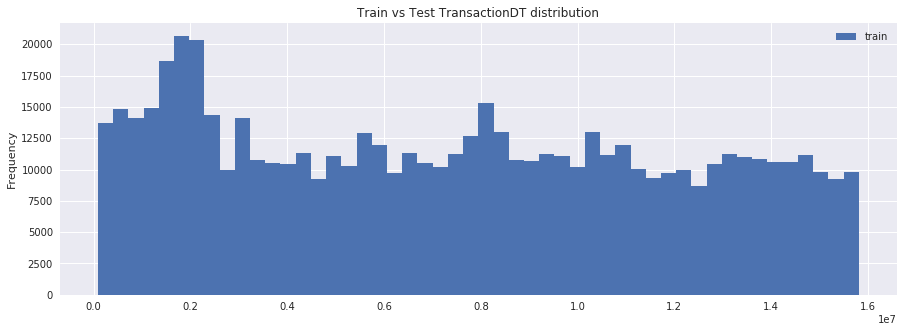

In [8]:
#Charting Transaction Date

train['TransactionDT'].plot(kind='hist',figsize=(15, 5),label='train',bins=50,
                                        title='Train vs Test TransactionDT distribution')
test['TransactionDT'].plot(kind='hist',label='test',bins=50)
plt.legend()
plt.show()

#Time gap between transaction date: convert transaction date to Datetime

In [9]:
#Transaction Date
startdate = datetime.datetime.strptime('2017-12-01', '%Y-%m-%d')

train['Date'] = train['TransactionDT'].apply(lambda x: (startdate + datetime.timedelta(seconds = x)))
train['_Weekdays'] = train['Date'].dt.dayofweek
train['_Hours'] = train['Date'].dt.hour
train['_Days'] = train['Date'].dt.day

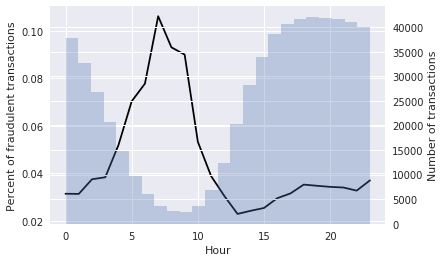

In [10]:
#relation of Hour vs. Fraudlent activities
plt.plot(train.groupby('_Hours').mean()['isFraud'], color='k')
ax = plt.gca()
ax2 = ax.twinx()
_ = ax2.hist(train['_Hours'], alpha=0.3, bins=24)
ax.set_xlabel('Hour')
ax.set_ylabel('Percent of fraudulent transactions')

ax2.set_ylabel('Number of transactions')

/apps/hadoop/data01/dataiku/dataiku-dss-5.0.2/python.packages/statsmodels/nonparametric/kde.py:475: DeprecationWarning: object of type <type 'numpy.float64'> cannot be safely interpreted as an integer.
  grid,delta = np.linspace(a,b,gridsize,retstep=True)


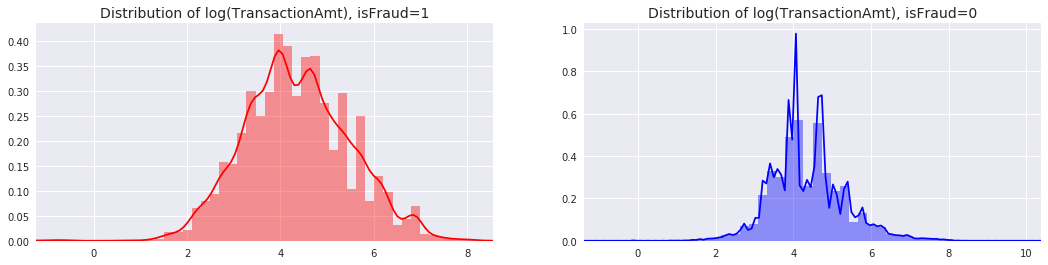

In [11]:
#Transaction Amount
fig, ax = plt.subplots(1, 2, figsize=(18,4))

bins = train.loc[train['isFraud'] == 1]['TransactionAmt'].values

sns.distplot(np.log(bins), ax=ax[0], color='r')
ax[0].set_title('Distribution of log(TransactionAmt), isFraud=1', fontsize=14)
ax[0].set_xlim([min(np.log(bins)), max(np.log(bins))])

bins = train.loc[train['isFraud'] == 0]['TransactionAmt'].values

sns.distplot(np.log(bins), ax=ax[1], color='b')
ax[1].set_title('Distribution of log(TransactionAmt), isFraud=0', fontsize=14)
ax[1].set_xlim([min(np.log(bins)), max(np.log(bins))])


plt.show()
#Distribution of transaction amount shows that fraudulent balances are more of a normal distribution.

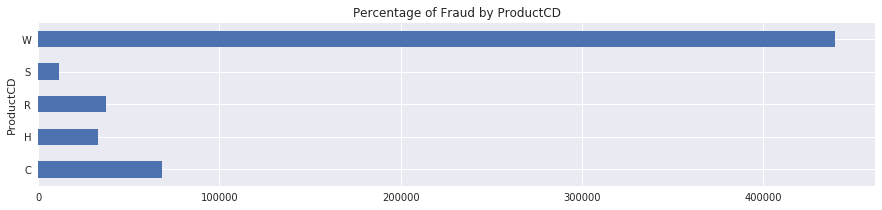

In [12]:
#Product ID
train.groupby('ProductCD')['isFraud'].count().sort_index().plot(kind='barh',
          figsize=(15, 3),
         title='Percentage of Fraud by ProductCD')
plt.show()
#W is the most frequenet fraudulent product

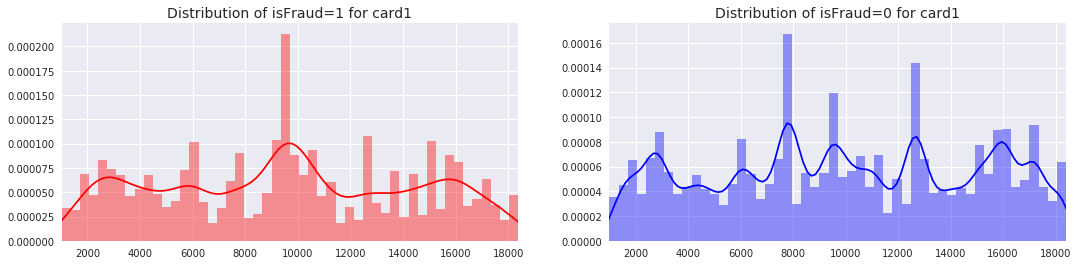

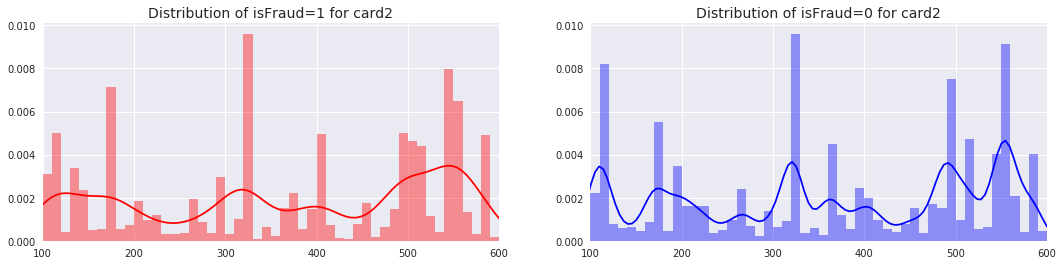

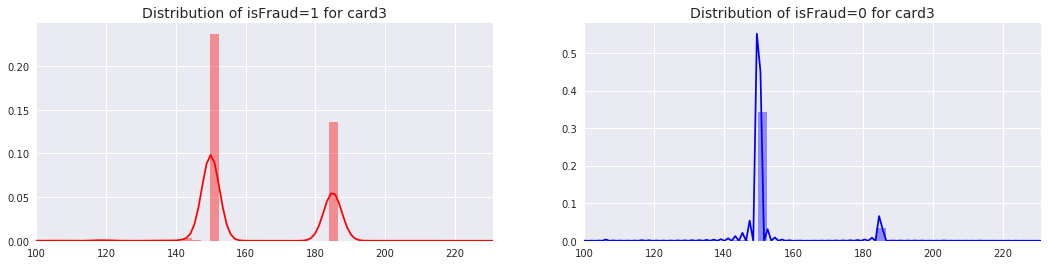

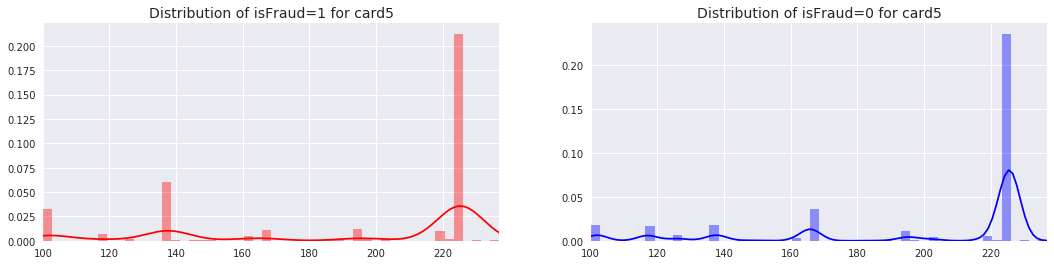

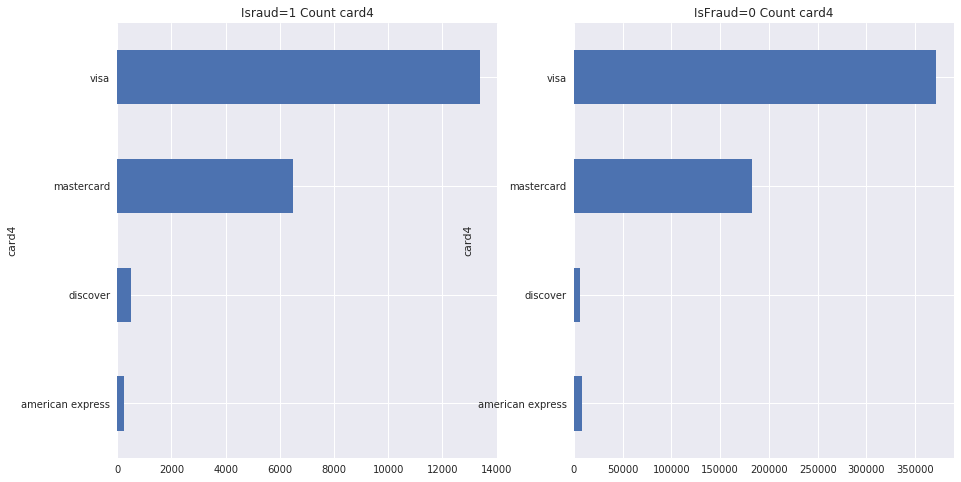

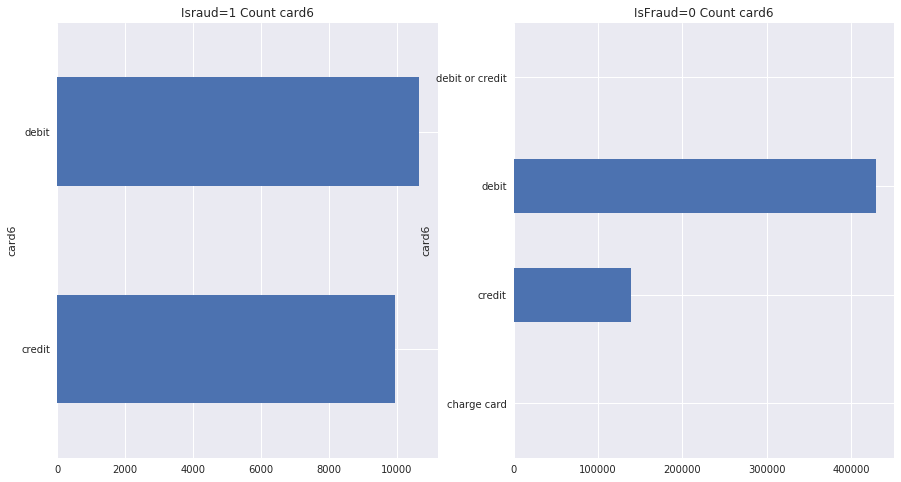

In [13]:
#card (1 to 6)
card_cols = [c for c in train.columns if 'card' in c]

train[card_cols].head()


for c in ['card1', 'card2', 'card3', 'card5']:
    fraud_type_histplot(train, c)


for c in ['card4', 'card6']:
    fraud_type_barplot(train, c)

   addr1  addr2
0  315.0   87.0
1  325.0   87.0
2  330.0   87.0
3  476.0   87.0
4  420.0   87.0


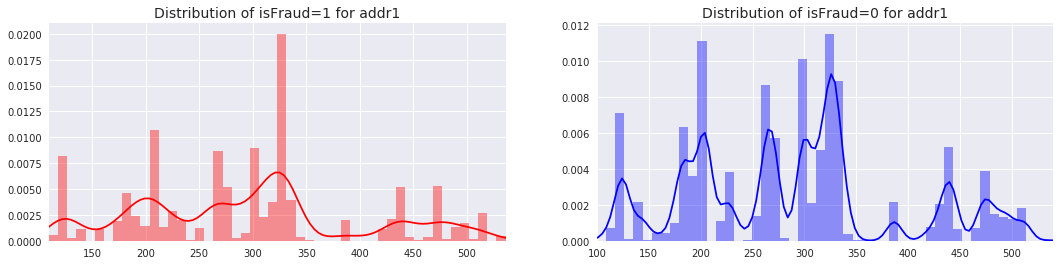

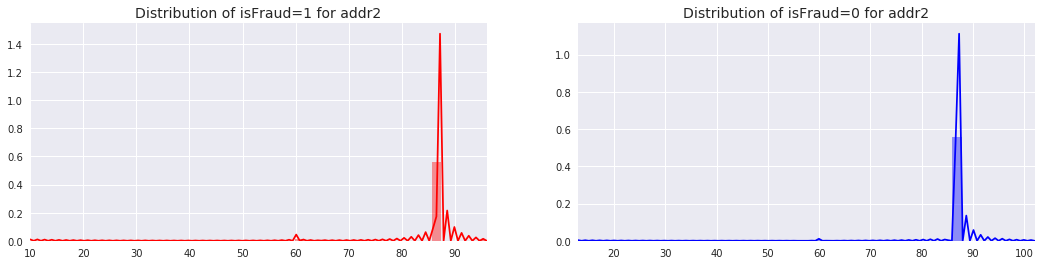

In [14]:
#addr (1 to 2)
addy_cols = [a for a in train.columns if 'addr' in a]
print(train[addy_cols].head())


for a in addy_cols :
    fraud_type_histplot(train, a)

  P_emaildomain R_emaildomain
0           NaN           NaN
1     gmail.com           NaN
2   outlook.com           NaN
3     yahoo.com           NaN
4     gmail.com           NaN


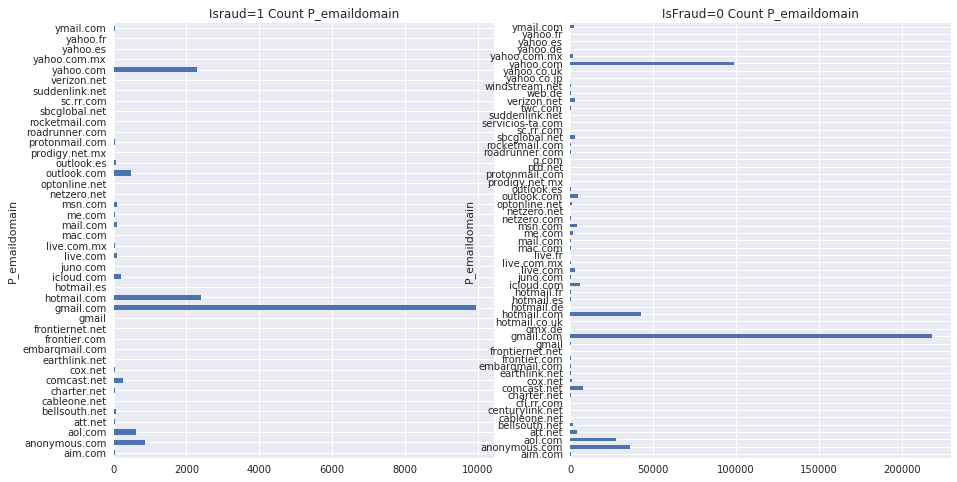

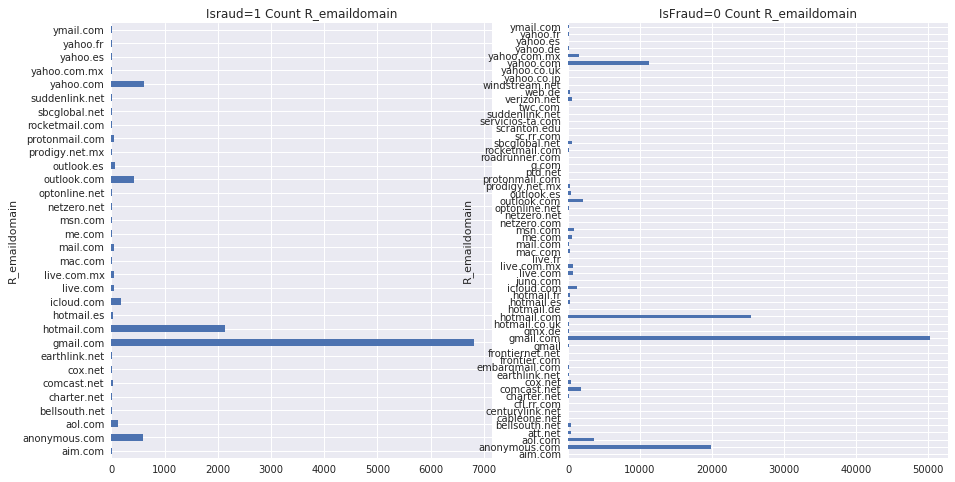

In [15]:
#email
email_cols = [e for e in train.columns if 'email' in e]
print(train[email_cols].head())


for e in email_cols :
    fraud_type_barplot(train, e)

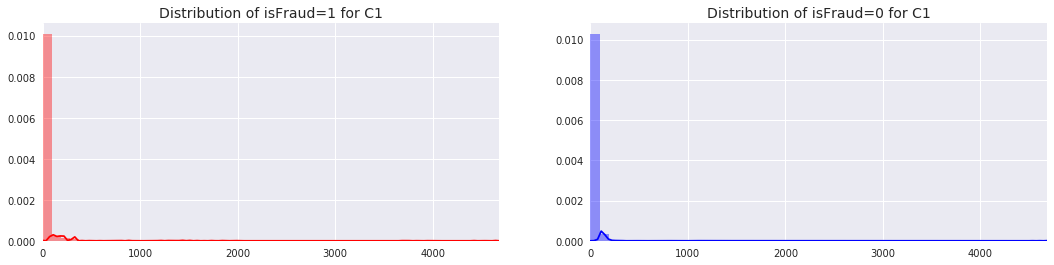

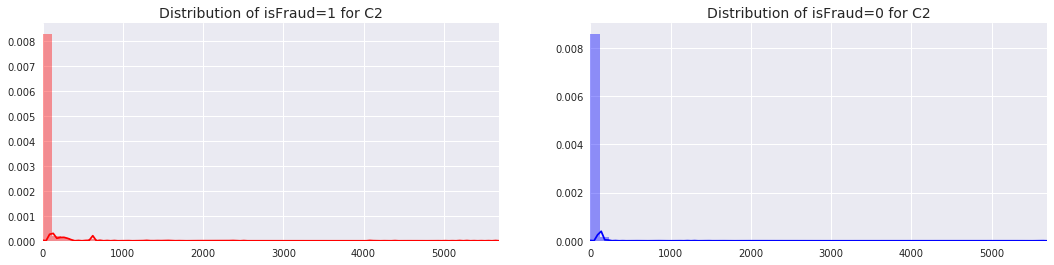

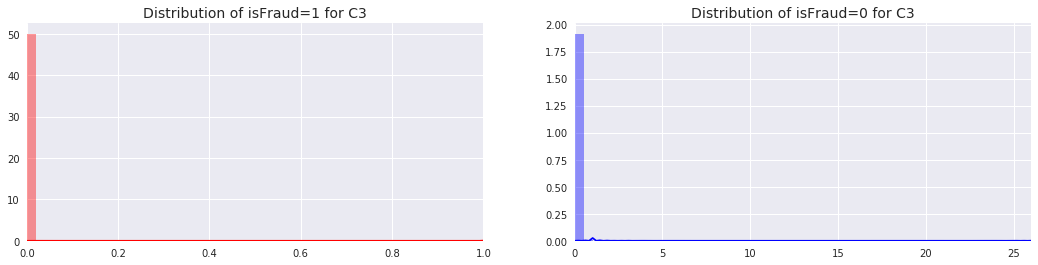

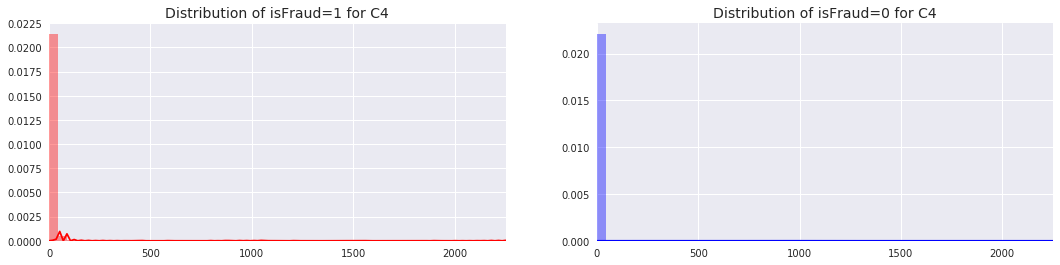

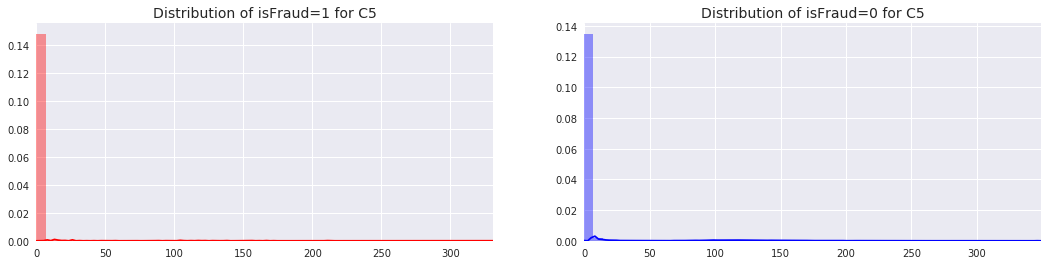

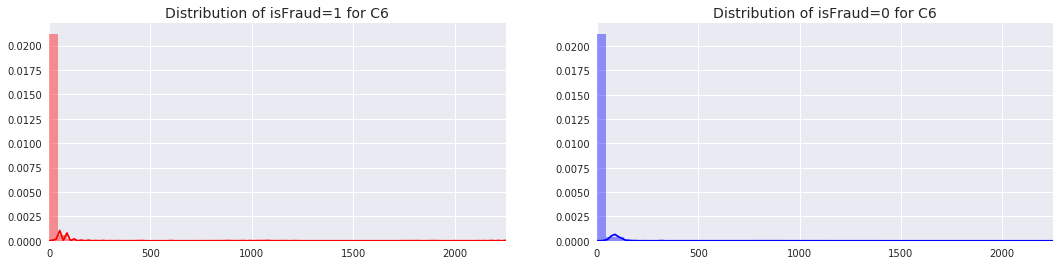

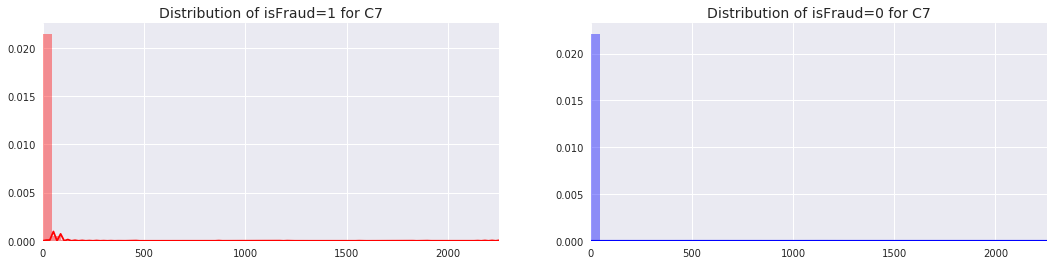

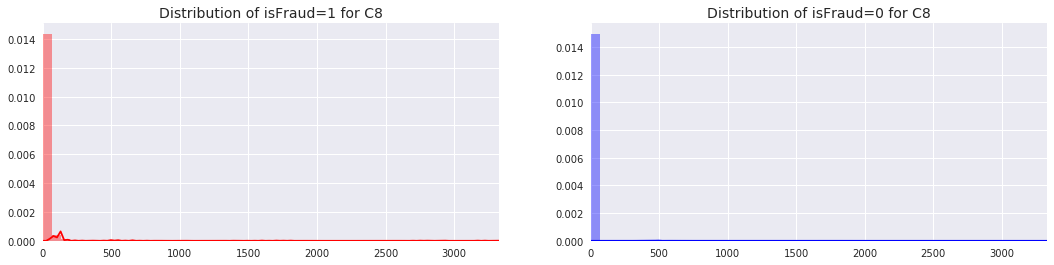

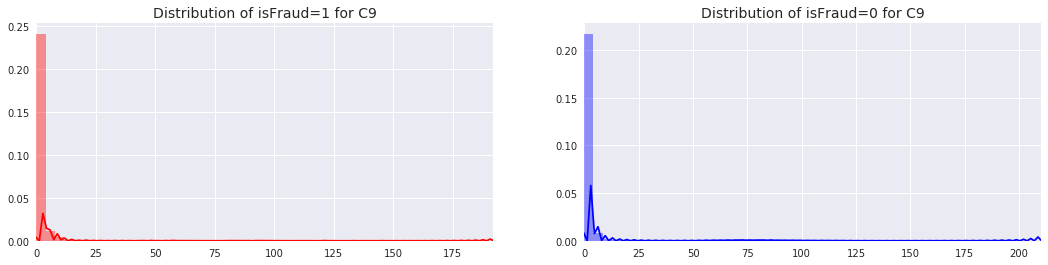

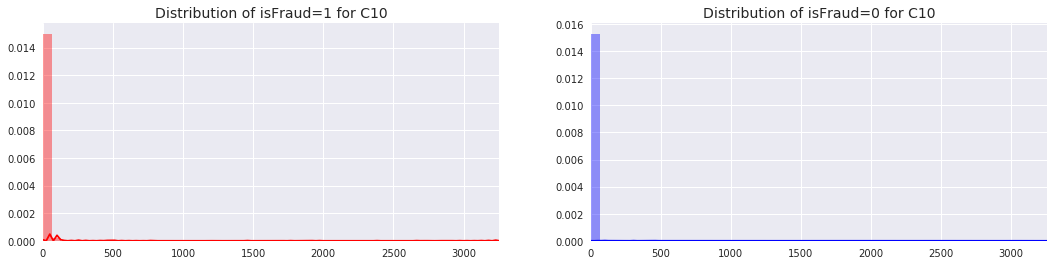

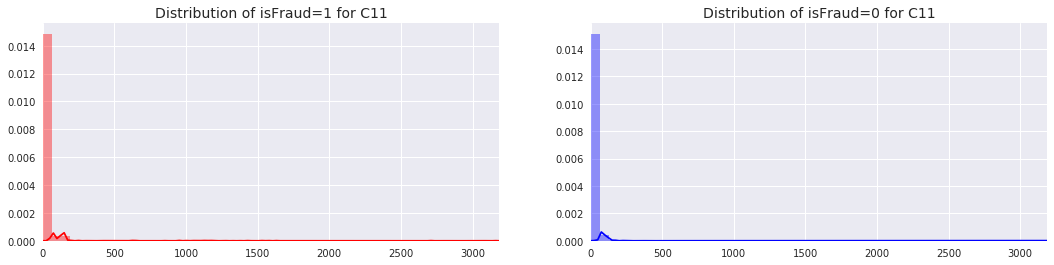

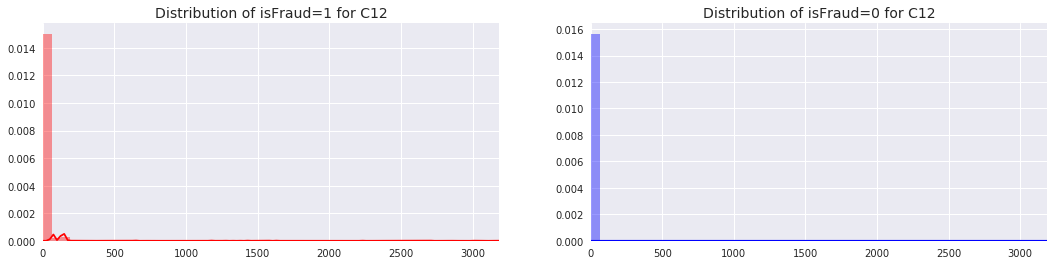

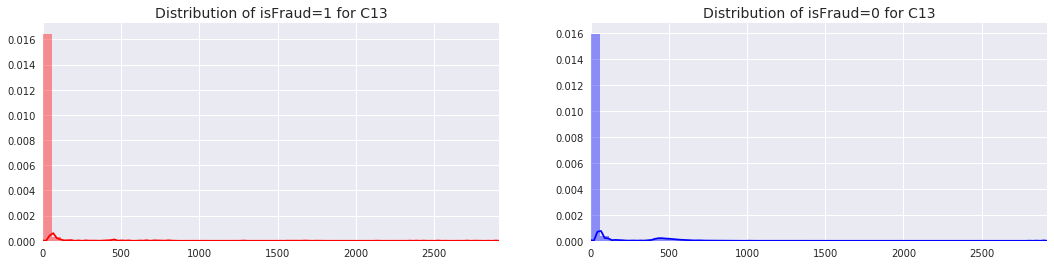

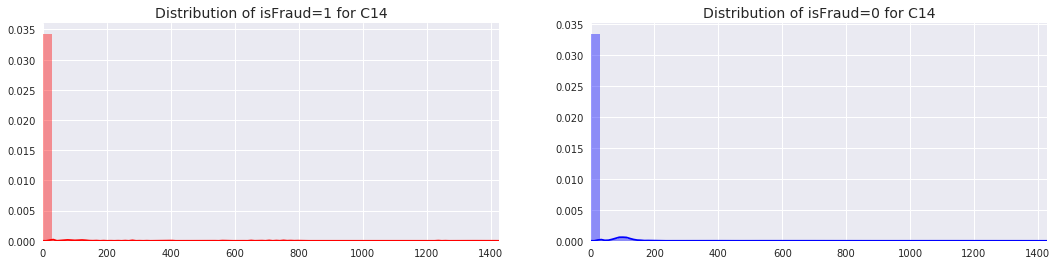

In [16]:
#C types (1 to 14)
c_cols = [c for c in train if c[0] == 'C']
train[c_cols].head()


for c in c_cols:
    fraud_type_histplot(train, c)

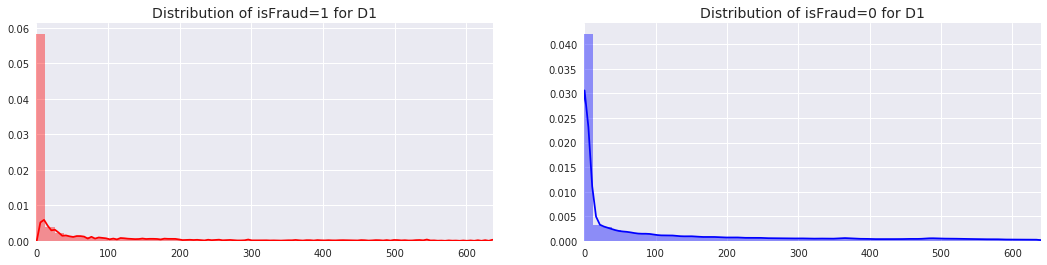

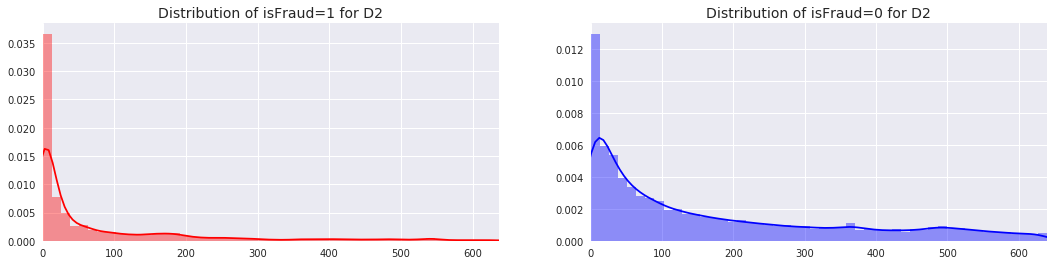

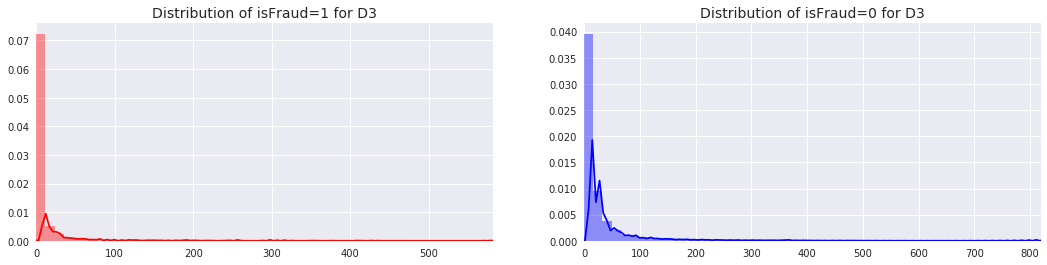

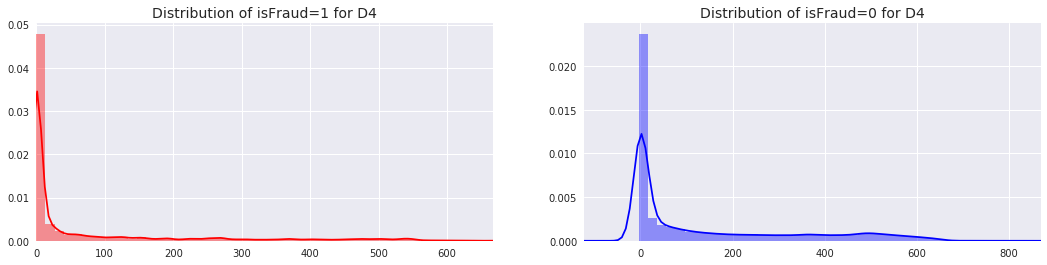

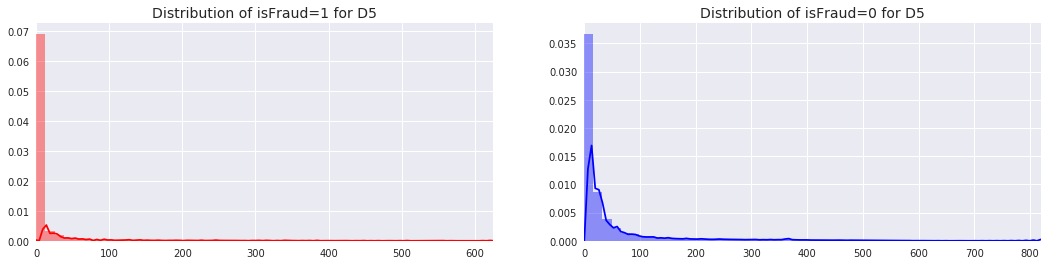

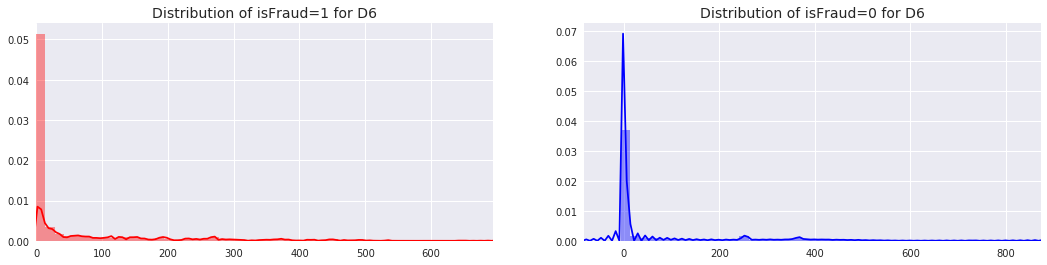

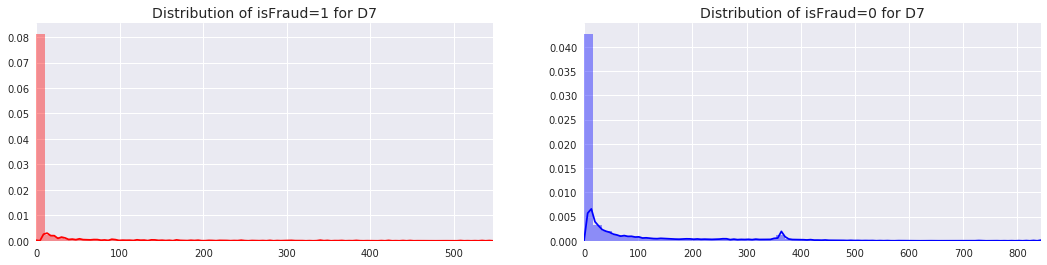

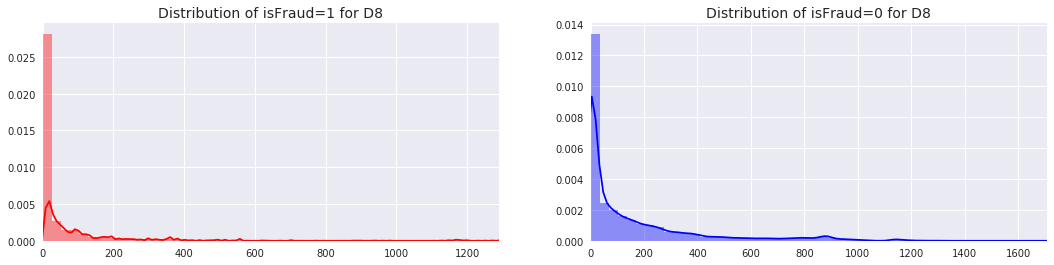

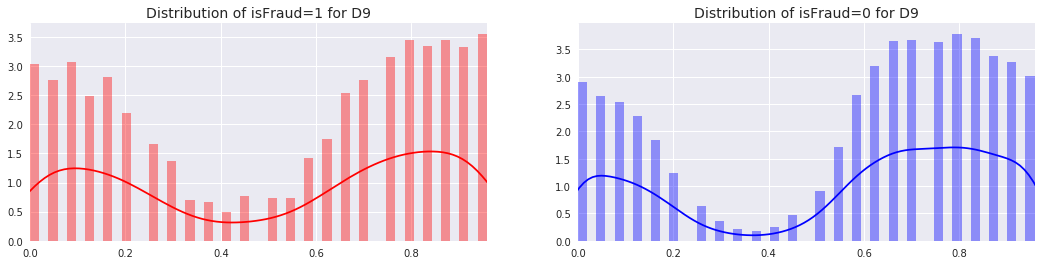

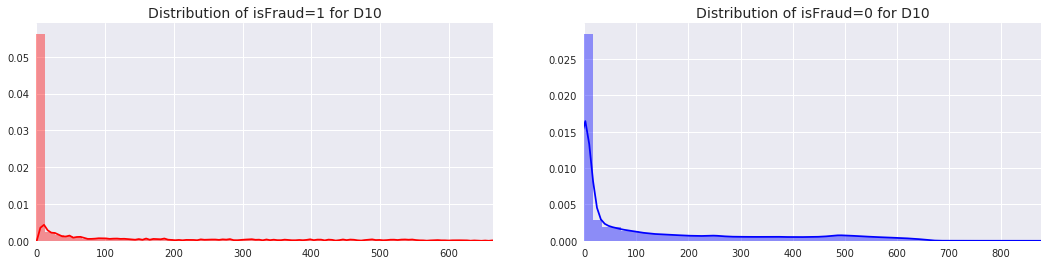

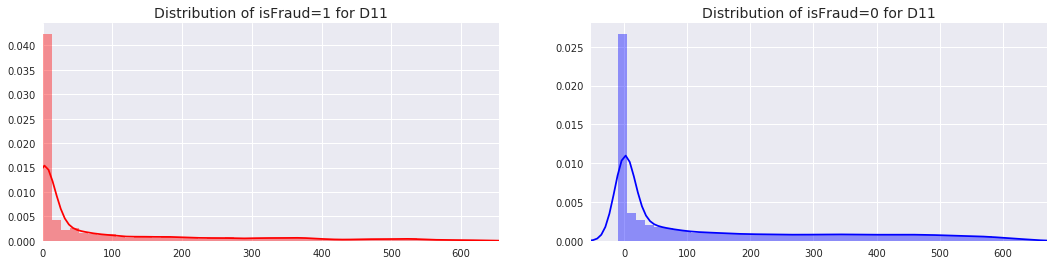

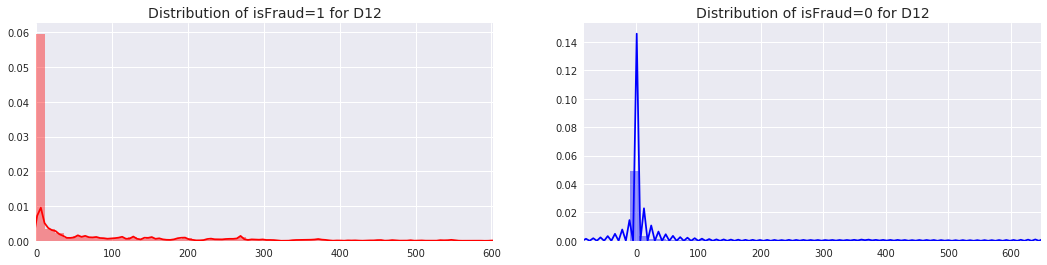

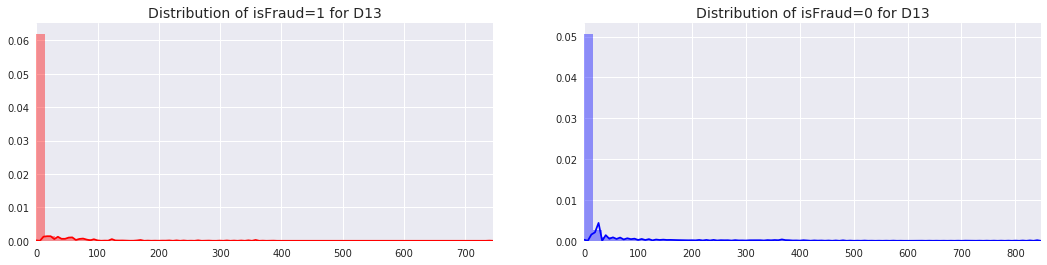

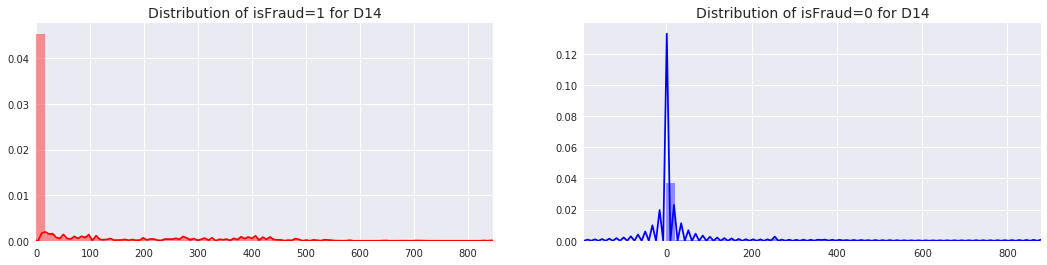

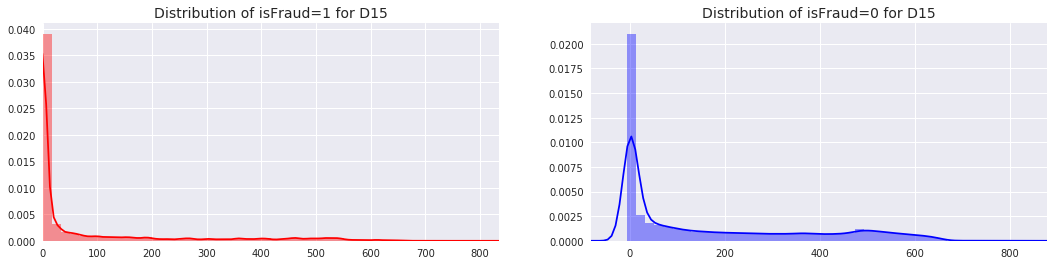

In [17]:
#D types (1 to 15)
d_cols = [d for d in train if d[0] == 'D'][0:15]
train[d_cols].head()


for d in d_cols:
    fraud_type_histplot(train, d)

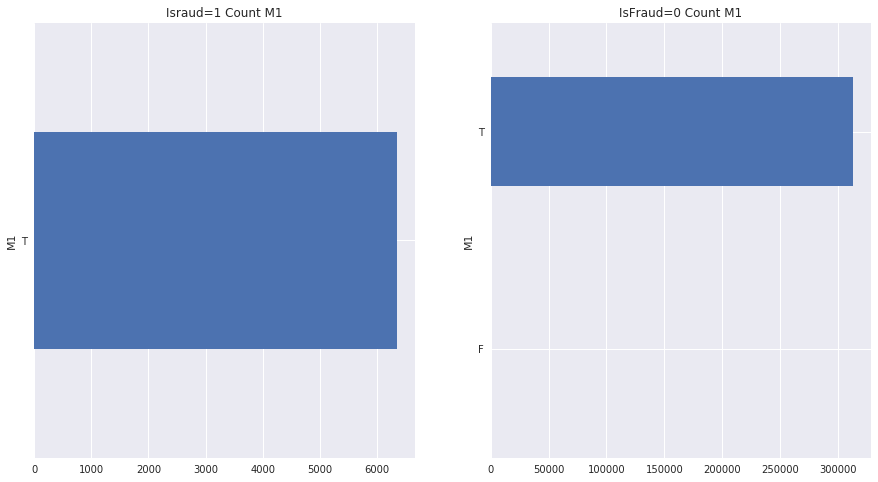

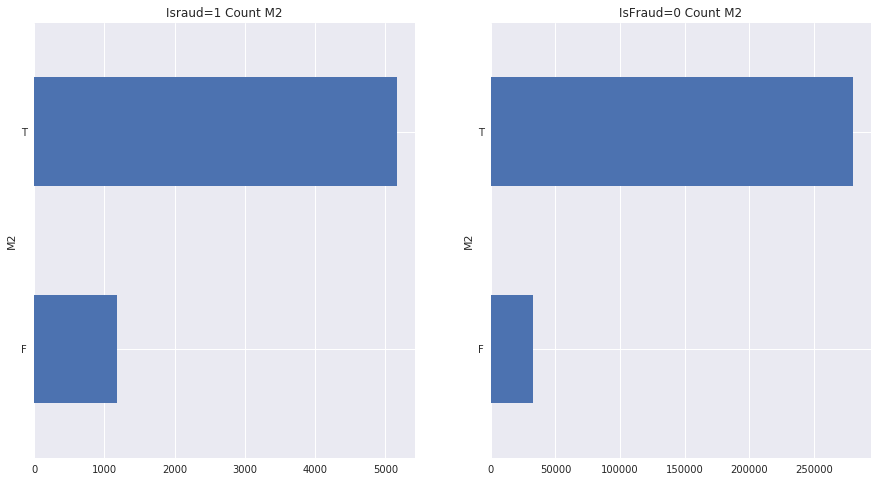

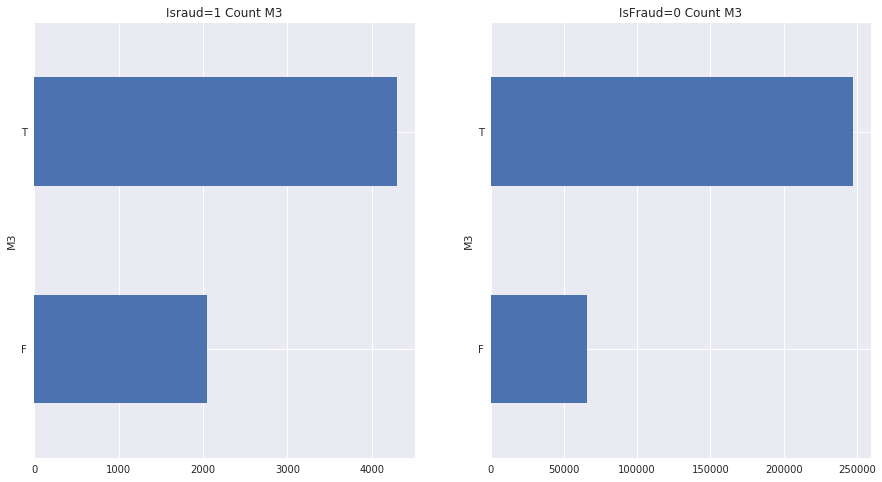

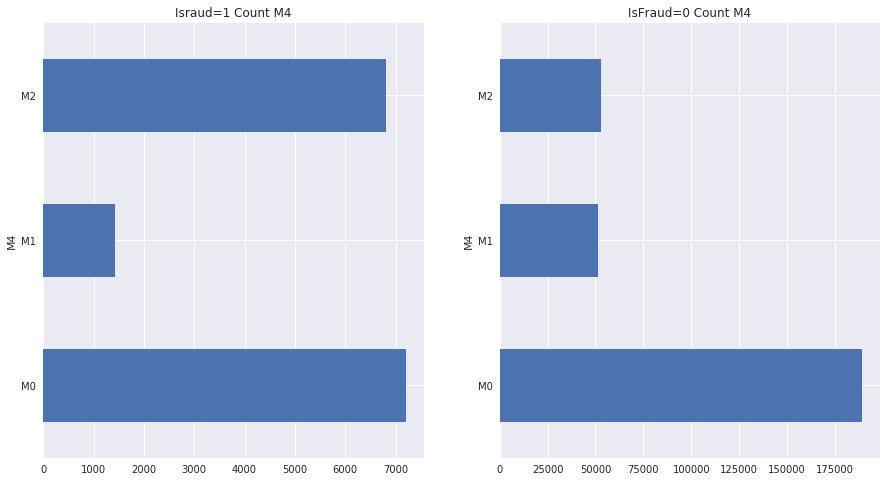

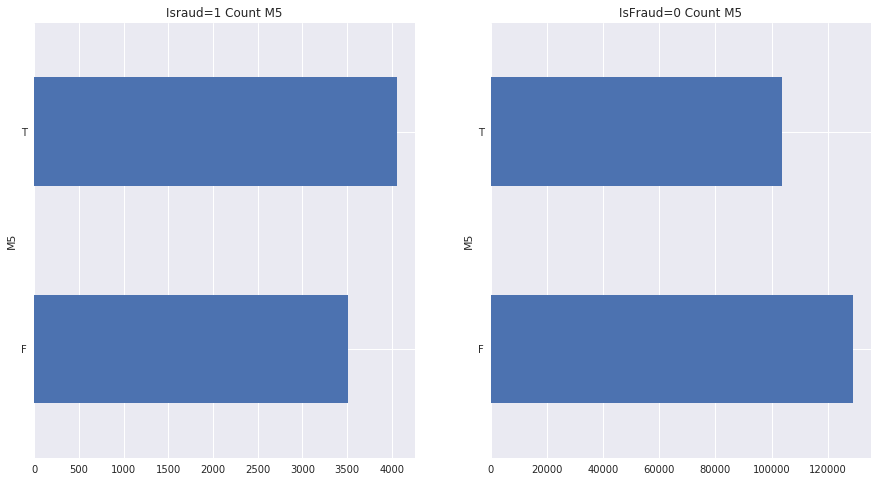

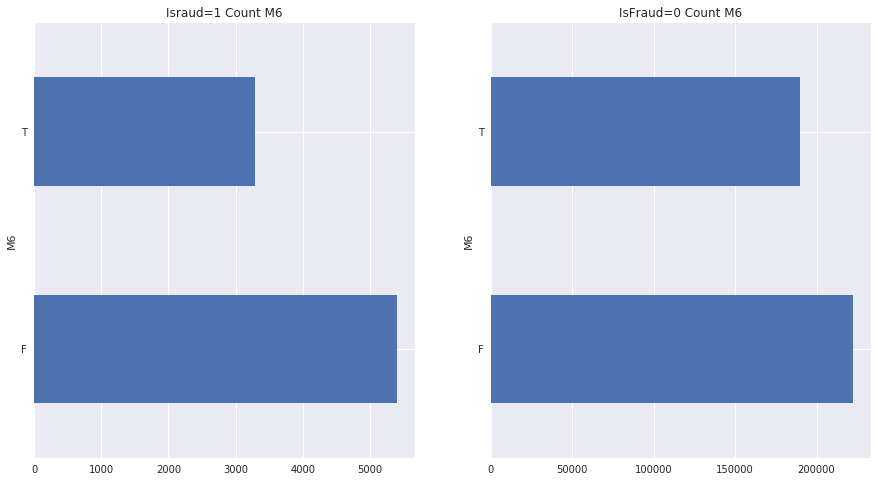

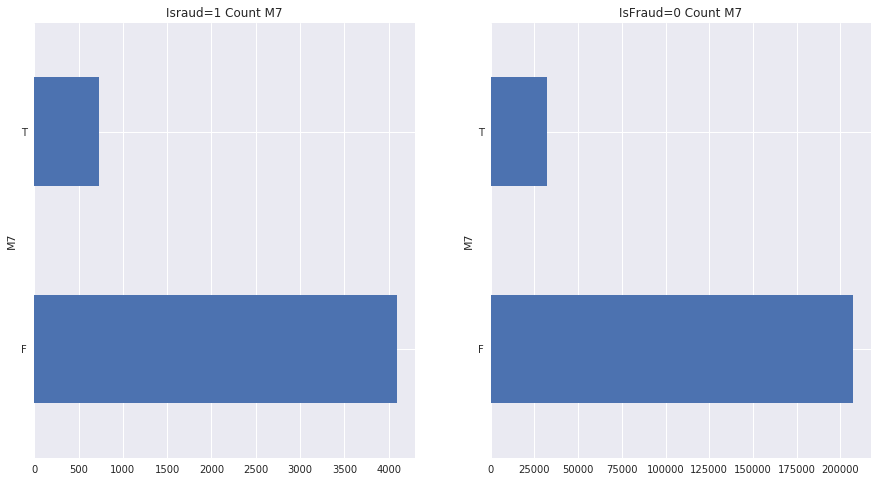

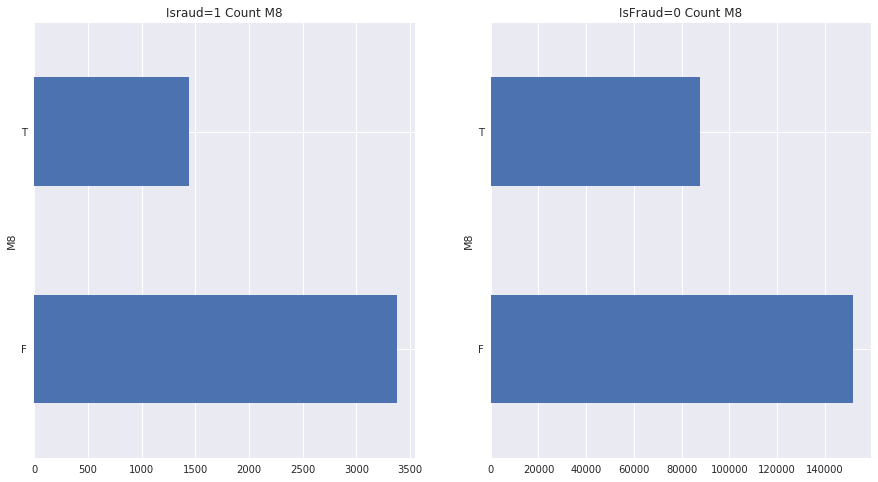

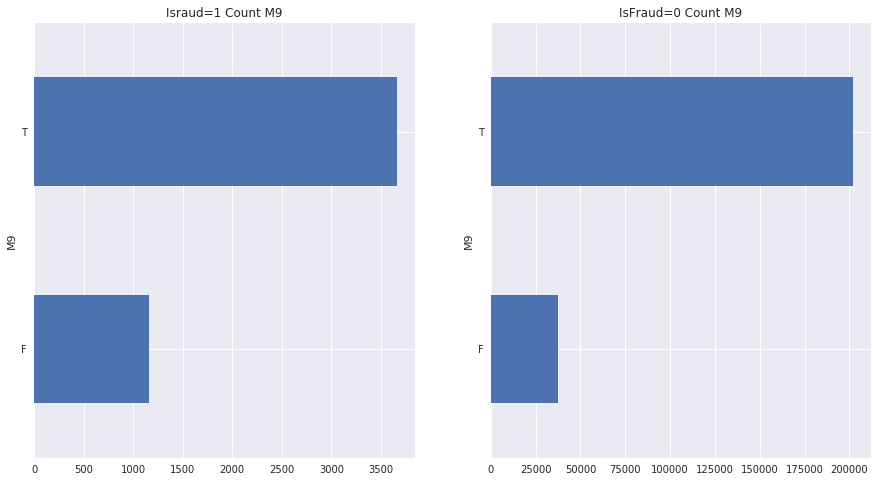

In [18]:
#M types (1 to 9)
m_cols = [m for m in train if m[0] == 'M']
train[m_cols].head()
train[m_cols].dtypes


for m in m_cols:
    fraud_type_barplot(train, m)

In [19]:
#V types (1 to 338)
v_cols = [v for v in train if v[0] == 'V']
train[v_cols].head()

#use PCA to reduce dimensionality

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44,V45,V46,V47,V48,V49,V50,V51,V52,V53,V54,V55,V56,V57,V58,V59,V60,V61,V62,V63,V64,V65,V66,V67,V68,V69,V70,V71,V72,V73,V74,V75,V76,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86,V87,V88,V89,V90,V91,V92,V93,V94,V95,V96,V97,V98,V99,V100,V101,V102,V103,V104,V105,...,V235,V236,V237,V238,V239,V240,V241,V242,V243,V244,V245,V246,V247,V248,V249,V250,V251,V252,V253,V254,V255,V256,V257,V258,V259,V260,V261,V262,V263,V264,V265,V266,V267,V268,V269,V270,V271,V272,V273,V274,V275,V276,V277,V278,V279,V280,V281,V282,V283,V284,V285,V286,V287,V288,V289,V290,V291,V292,V293,V294,V295,V296,V297,V298,V299,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321,V322,V323,V324,V325,V326,V327,V328,V329,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,117.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,48.0,28.0,0.0,10.0,4.0,1.0,38.0,24.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

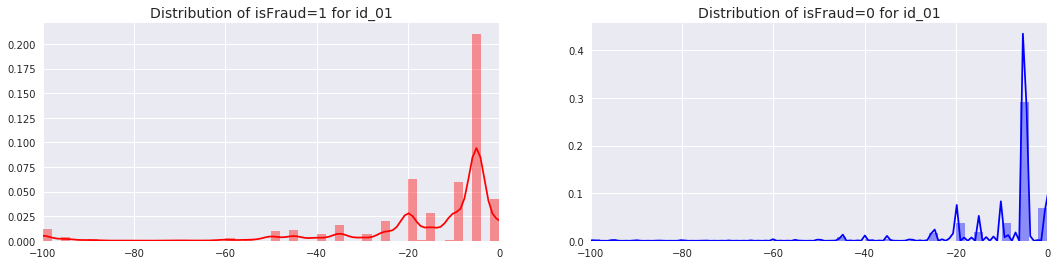

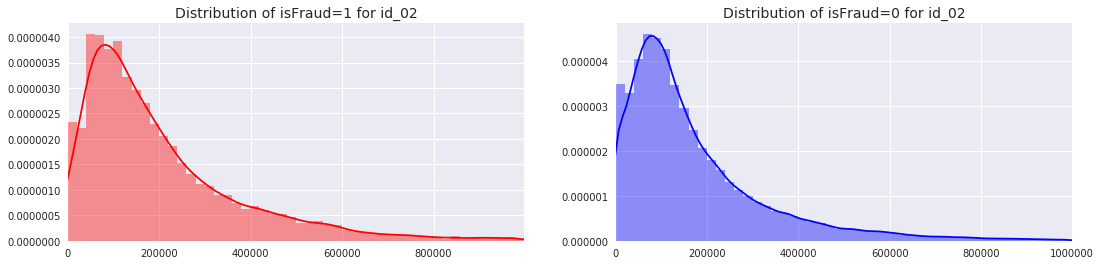

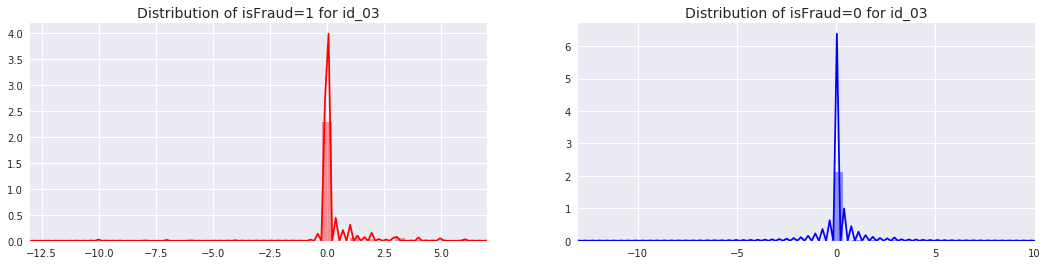

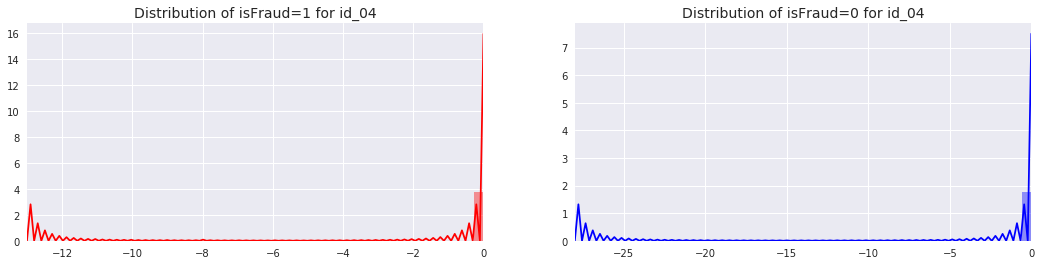

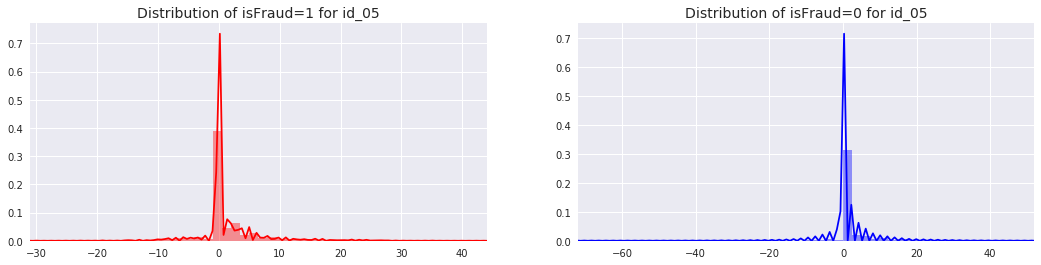

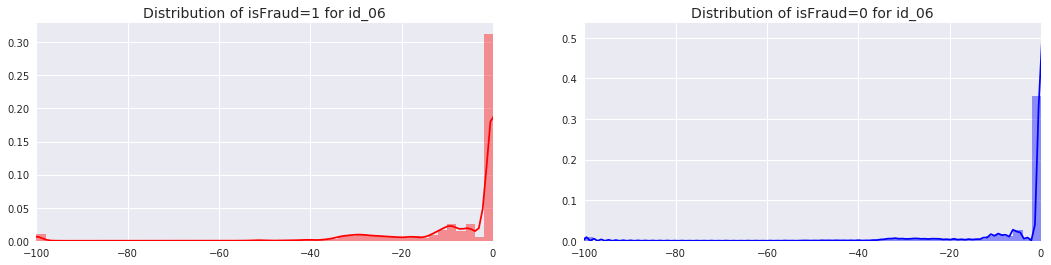

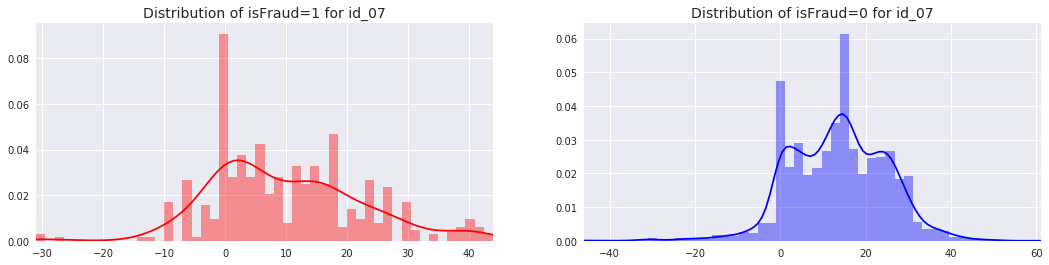

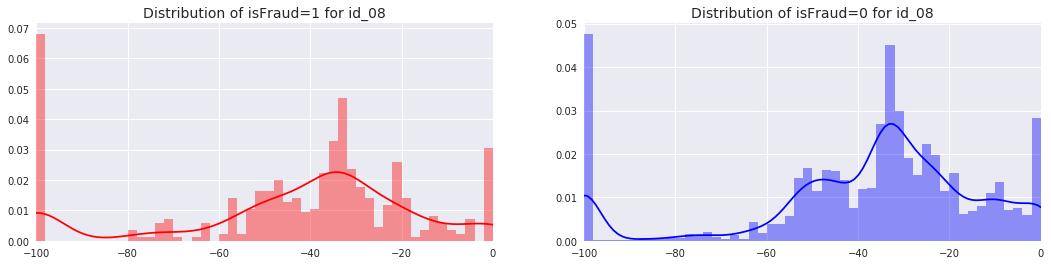

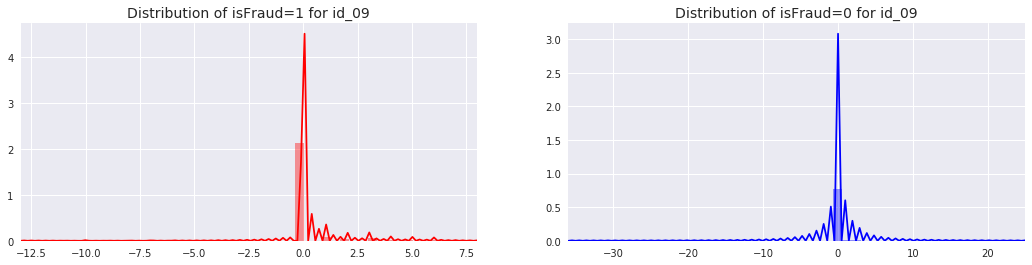

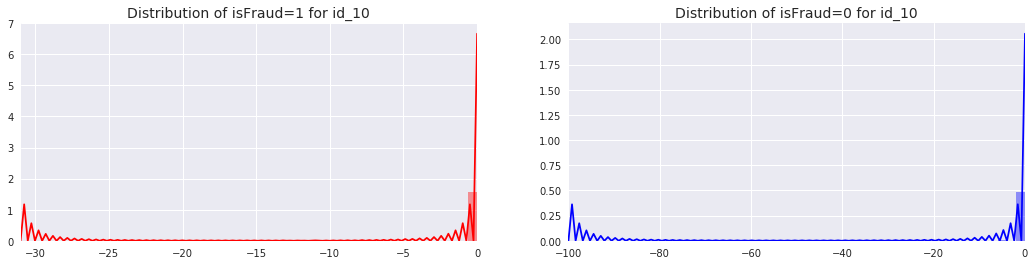

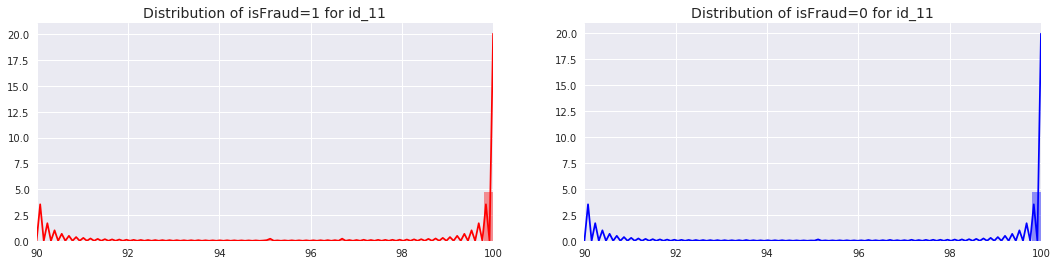

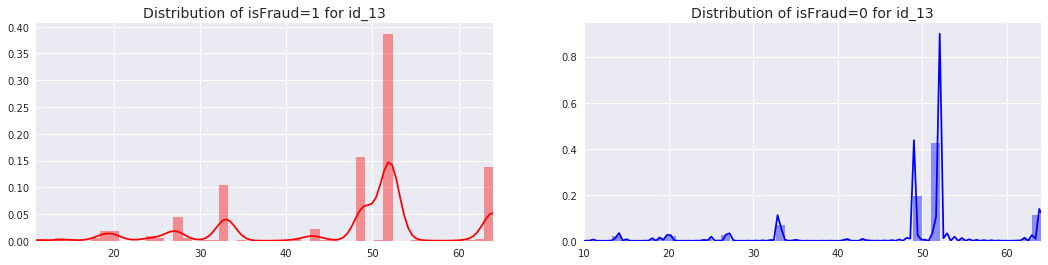

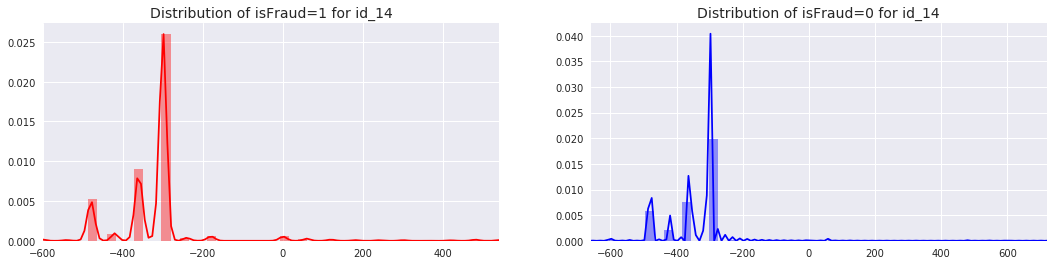

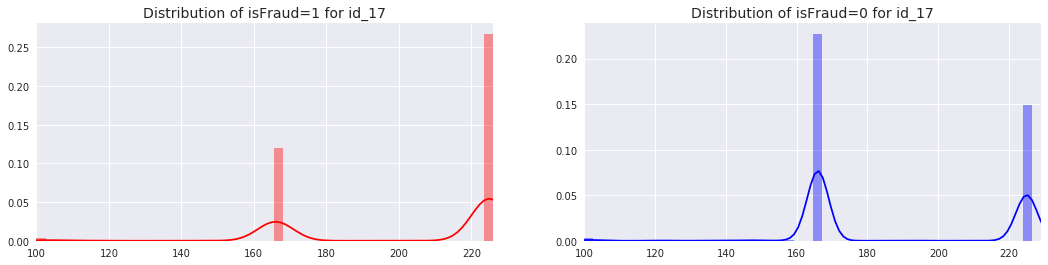

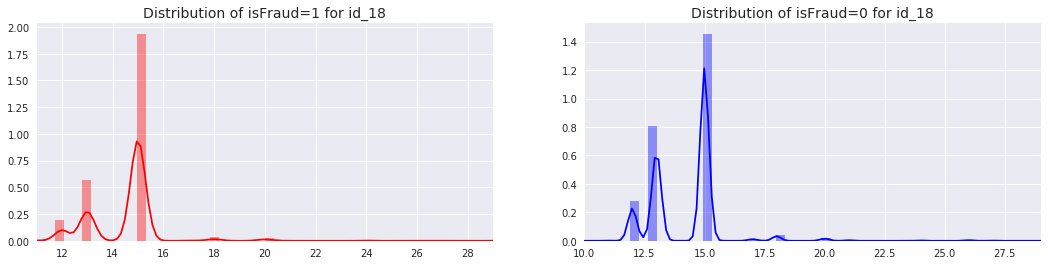

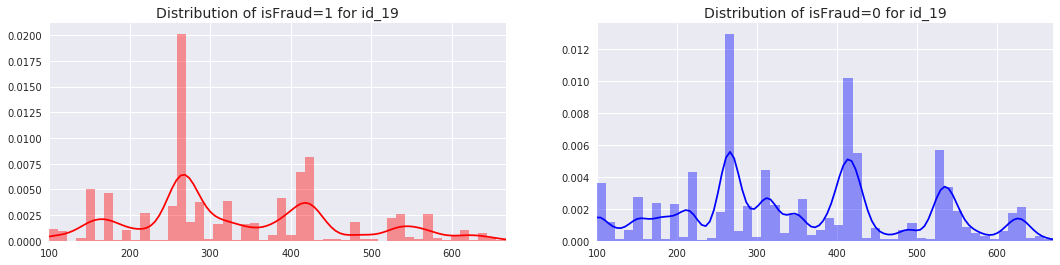

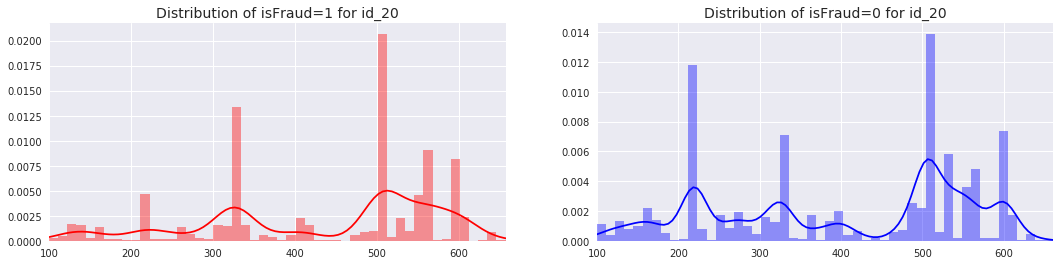

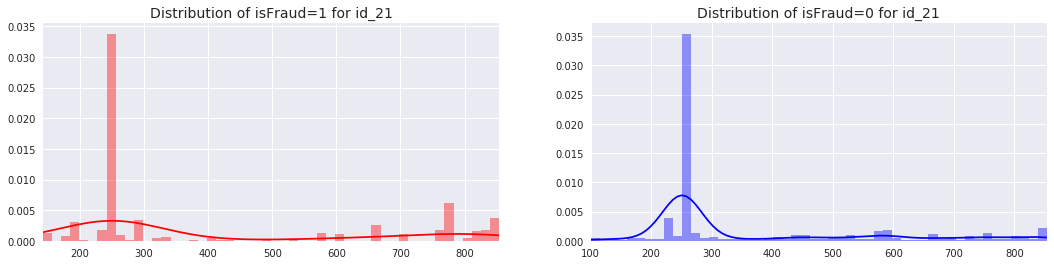

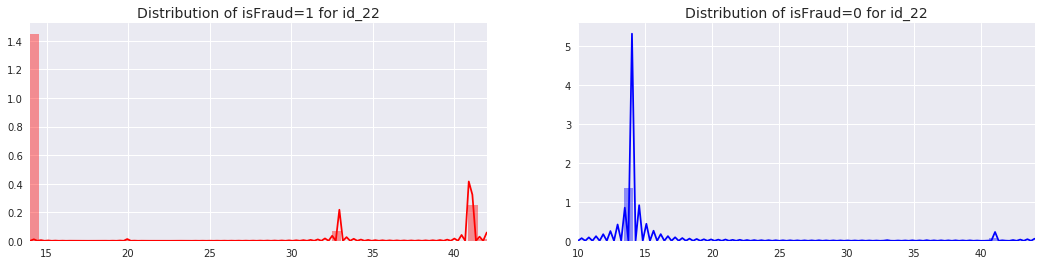

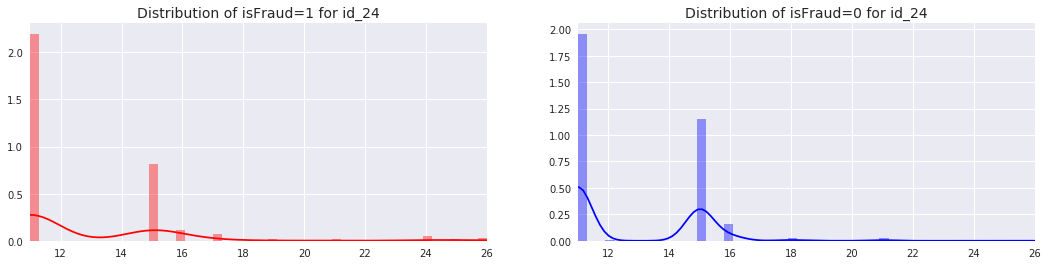

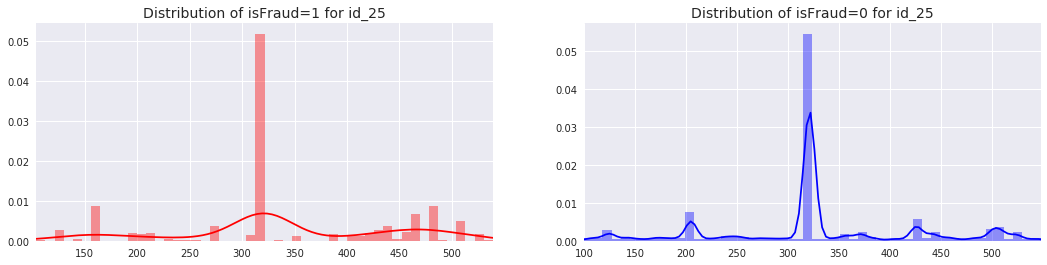

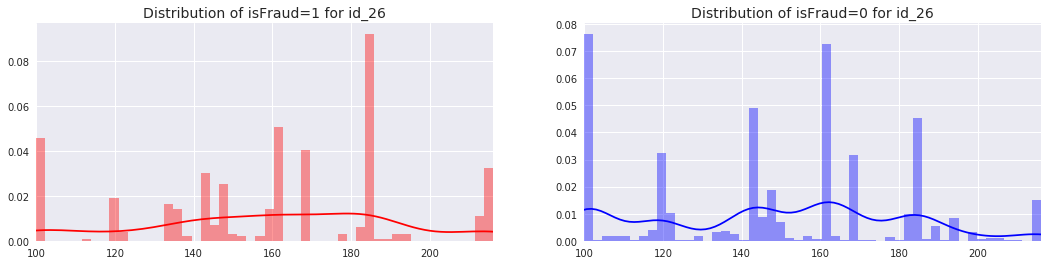

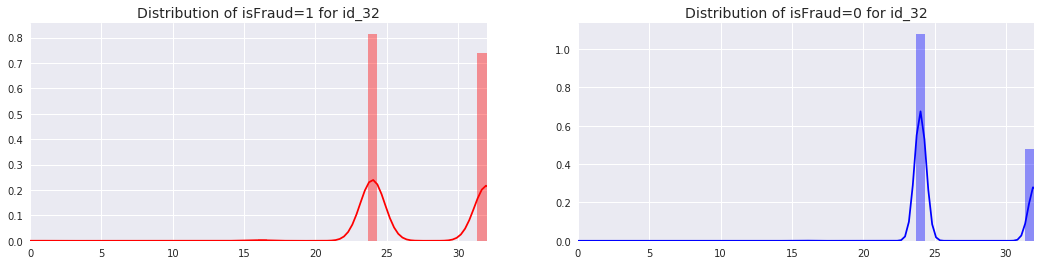

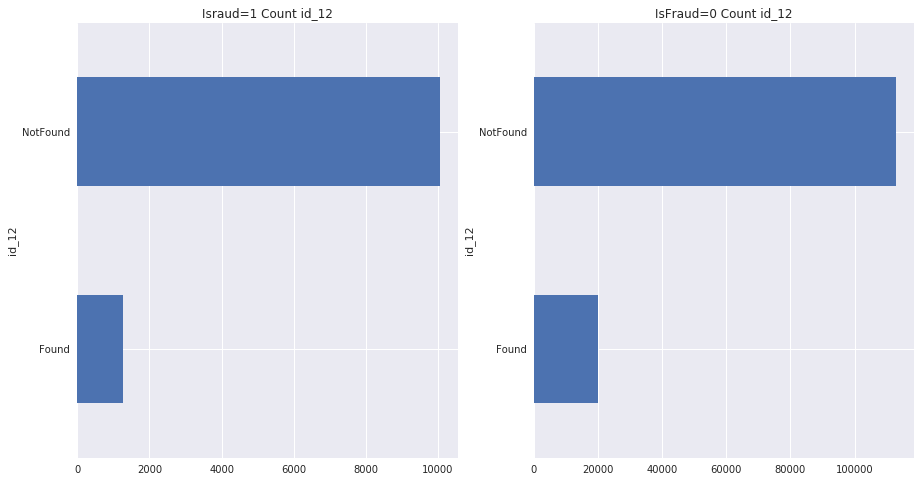

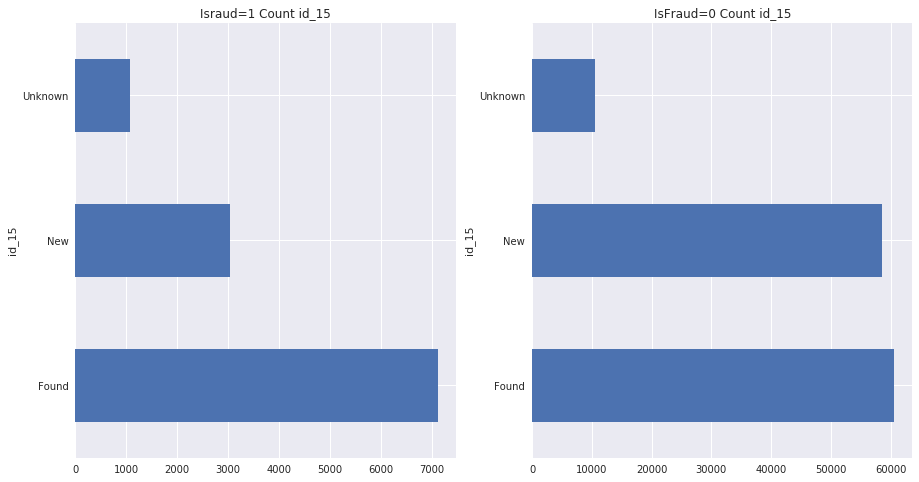

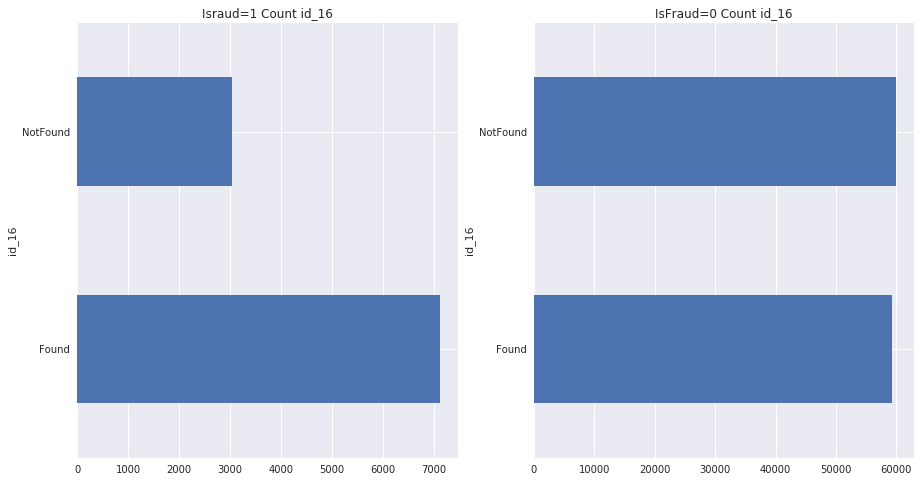

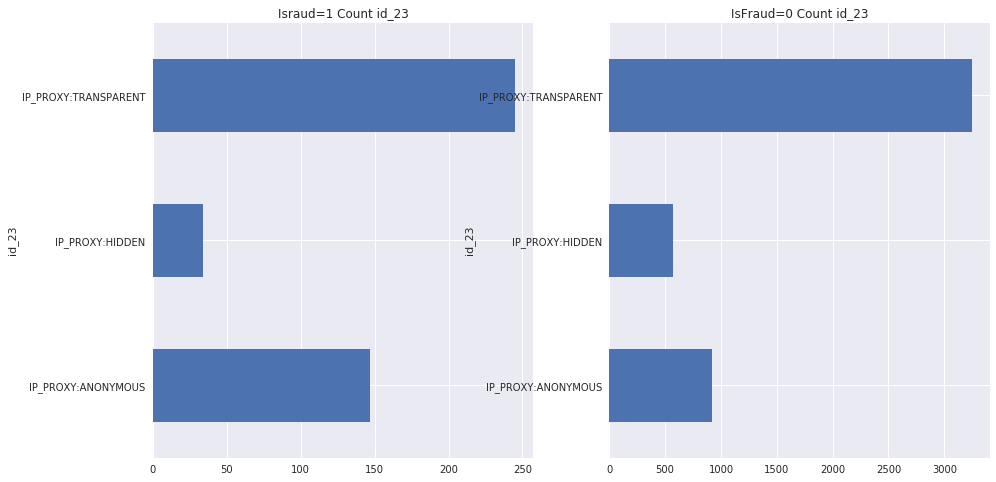

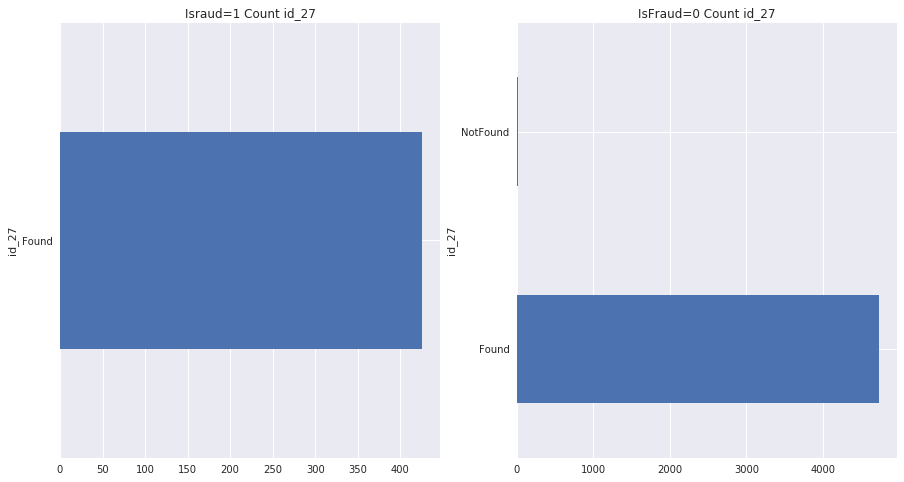

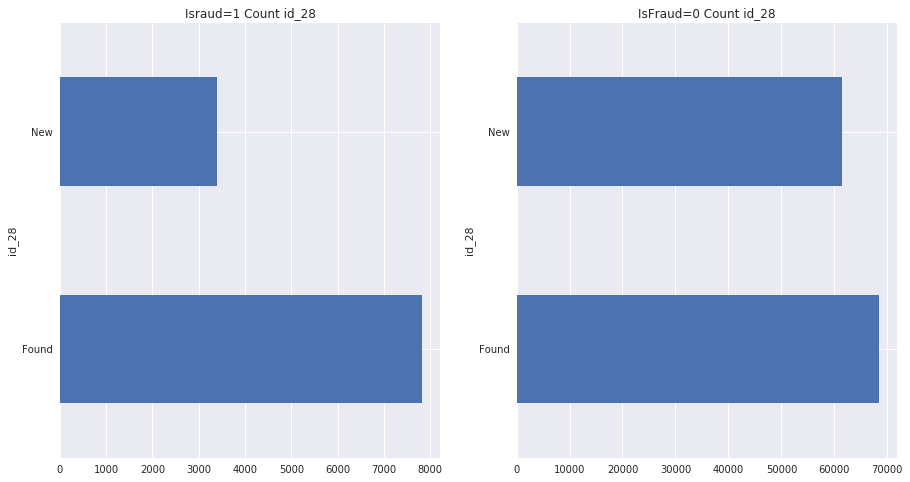

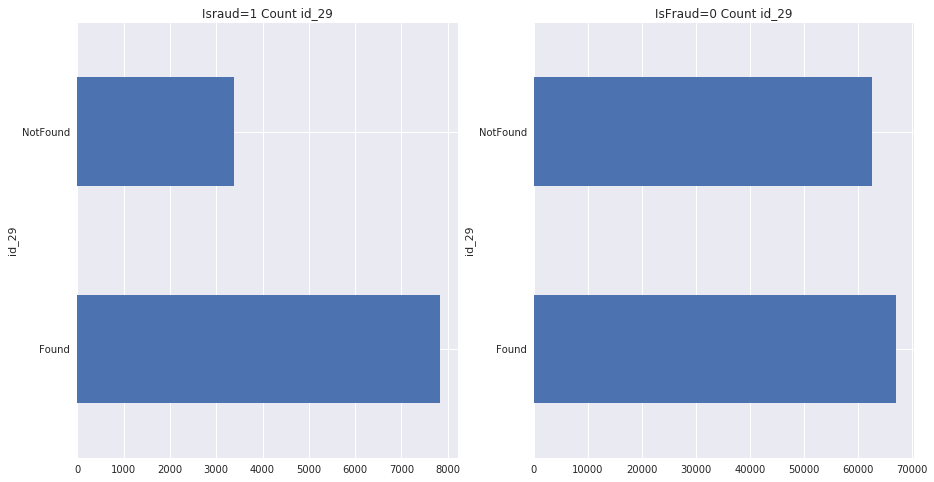

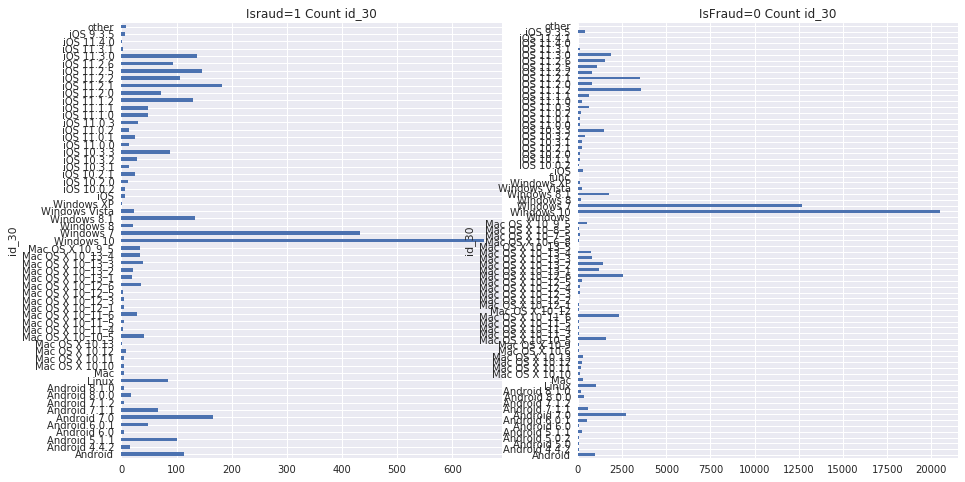

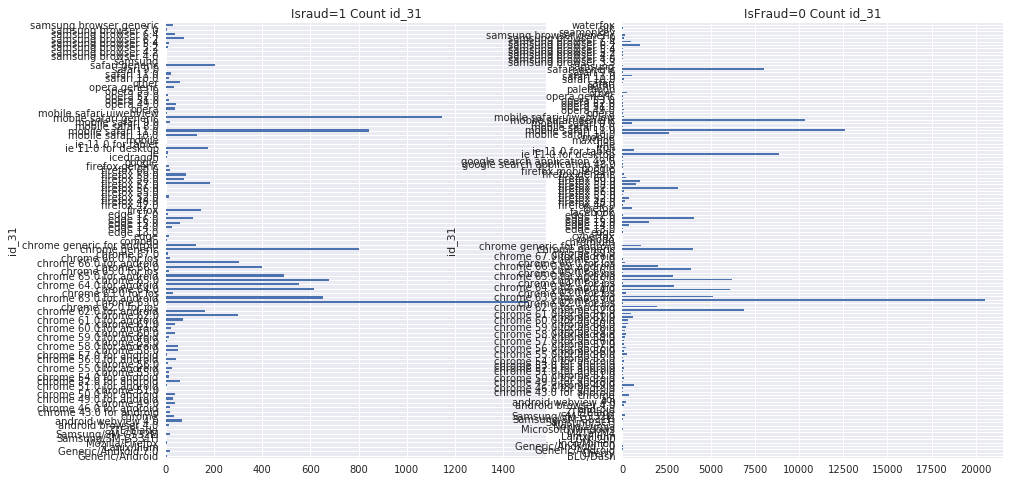

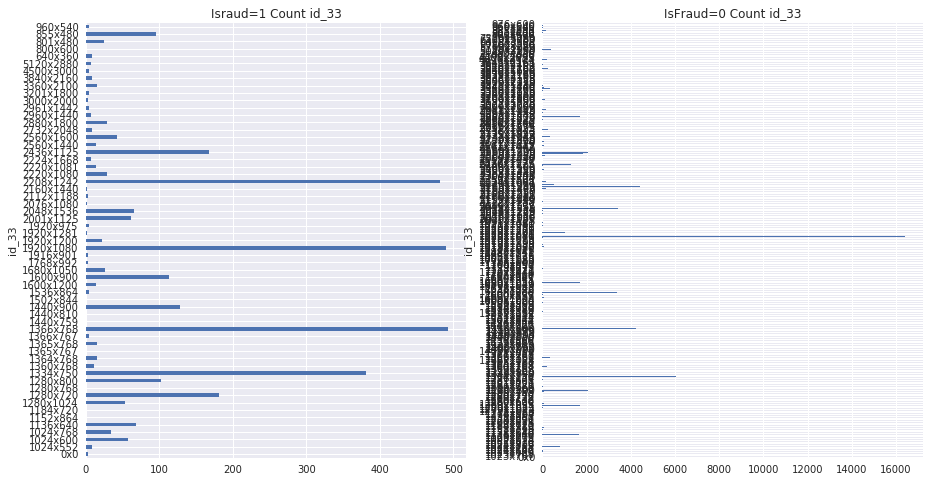

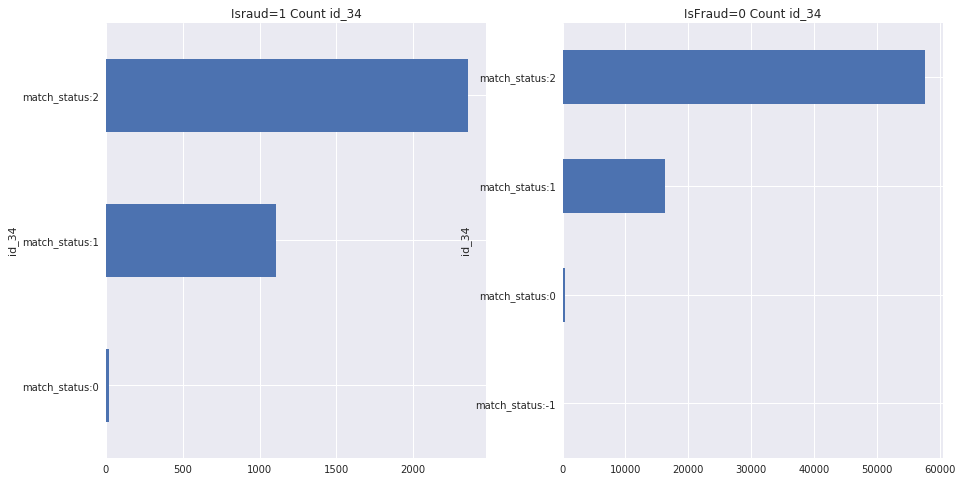

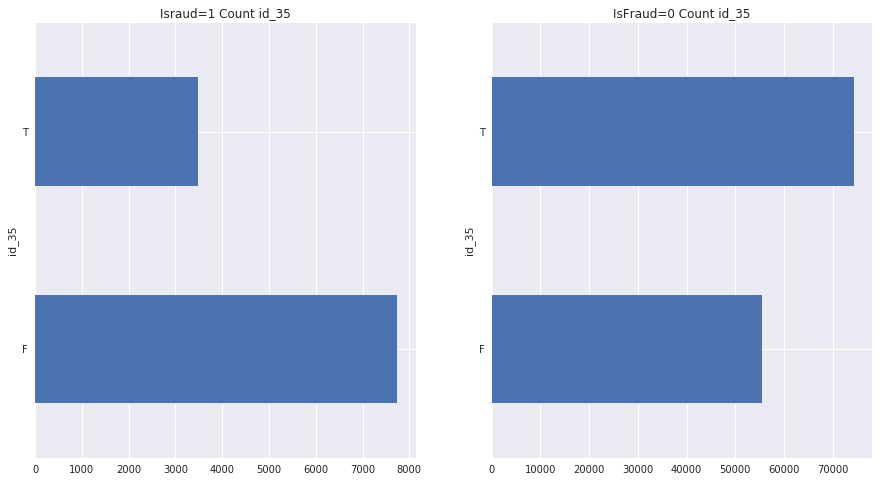

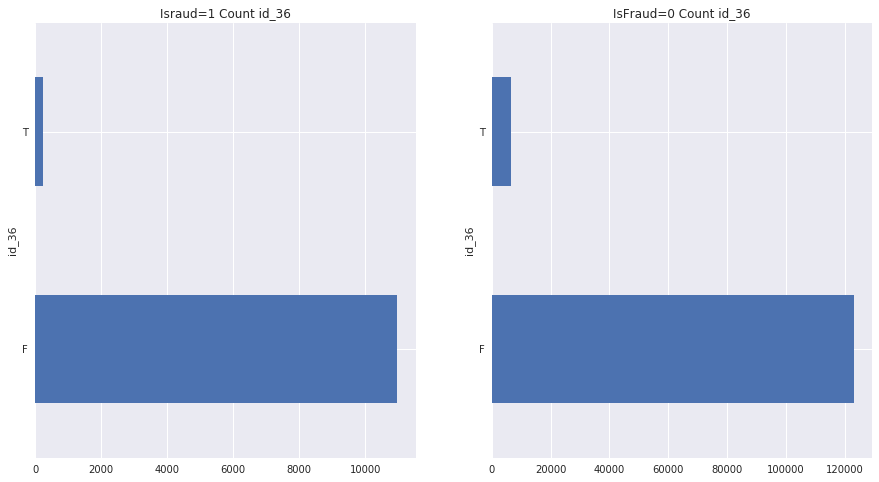

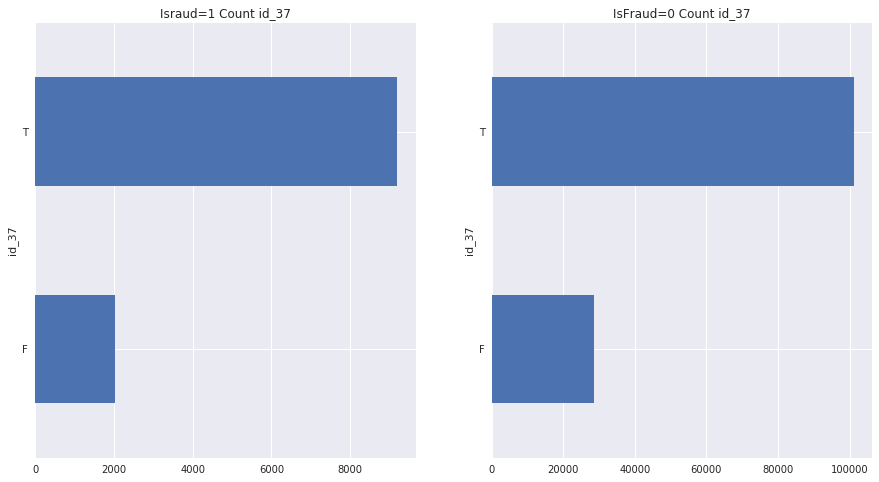

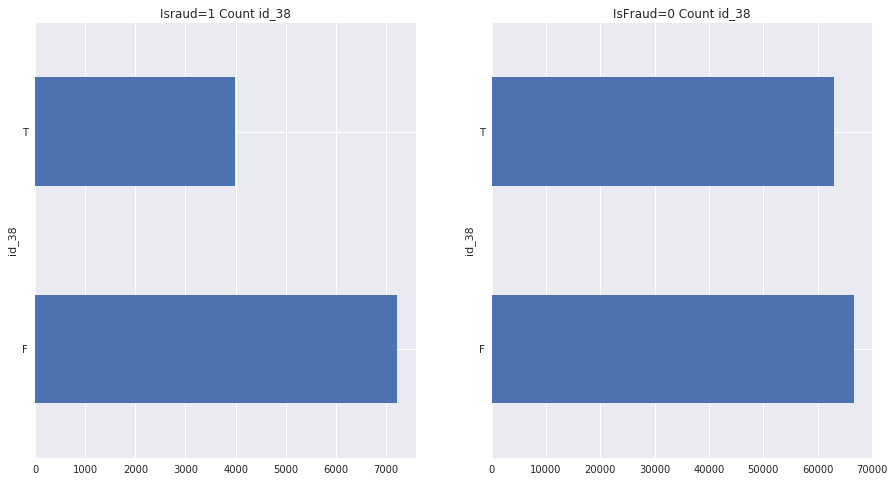

In [20]:
#id (01 to 38)
i_cols = [i for i in train if i[0] == 'i'][1:39]
train[i_cols].head()
#train[i_cols].dtypes


#For ID float types:
for i in i_cols:
    fraud_type_histplot(train, i)


#For ID Object types:
for i in i_cols:
    fraud_type_barplot(train, i)
    #print(i)

In [21]:
#Device Info
#train['DeviceInfo'].unique().tolist()

#Count the number of Frauds by Device Info
train_fraud = train.loc[train['isFraud']==1]
train_nofraud = train.loc[train['isFraud']==0]
X = pd.DataFrame(train_fraud.groupby('DeviceInfo')['DeviceInfo'].size().rename('count').reset_index())
Y = pd.DataFrame(train_nofraud.groupby('DeviceInfo')['DeviceInfo'].size().rename('count').reset_index())
X.columns = ['DeviceInfo', 'Fraud_Instances']
Y.columns = ['DeviceInfo', 'NoFraud_Instances']
Z = pd.merge(Y, X, on='DeviceInfo', how='left')
Z['Fraud_Percent']=(Z['Fraud_Instances']/ (Z['Fraud_Instances'] + Z['NoFraud_Instances']))*100
Z.sort_values(by=['Fraud_Percent'],ascending=False)[1:20]


#Create groups of DeviceInfo based on Fraud Percent
Z.loc[Z['Fraud_Percent'] > 50.0, 'DeviceFraud'] = 'High'
Z.loc[(Z['Fraud_Percent'] >25.0) & (Z['Fraud_Percent'] <= 50.0), 'DeviceFraud'] = 'M_high'
Z.loc[(Z['Fraud_Percent'] >10.0) & (Z['Fraud_Percent'] <= 25.0), 'DeviceFraud'] = 'M_Low'
Z.loc[Z['Fraud_Percent'] <= 10.0, 'DeviceFraud'] = 'Low'


#Combine with Train data set
train = pd.merge(train, Z[['DeviceInfo', 'DeviceFraud']], on='DeviceInfo', how='left')
#test = pd.merge(test, Z[['DeviceInfo', 'DeviceFraud']], on='DeviceInfo', how='left')

Preprocessing and Feature Transformation

In [22]:
def id_transform(data):
    data['OS_id_30'] = data['id_30'].str.split(' ', expand=True)[0]
    data['version_id_30'] = data['id_30'].str.split(' ', expand=True)[1]
    data['OS_id_30'].fillna('None', inplace=True)
    data['version_id_30'].fillna('None', inplace=True)

    data['browser_id_31'] = data['id_31'].str.split(' ', expand=True)[0]
    data['version_id_31'] = data['id_31'].str.split(' ', expand=True)[1]
    data['browser_id_31'].fillna('None', inplace=True)
    data['version_id_31'].fillna('None', inplace=True)

    data['screen_width'] = data['id_33'].str.split('x', expand=True)[0]
    data['screen_height'] = data['id_33'].str.split('x', expand=True)[1]
    data['screen_width'].fillna(-1, inplace=True)
    data['screen_height'].fillna(-1, inplace=True)
    return data

In [23]:
def transamount_transform(data):
    data['TransactionAmt_to_mean_card1'] = data['TransactionAmt'] / data.groupby(['card1'])['TransactionAmt'].transform('mean')
    data['TransactionAmt_to_mean_card4'] = data['TransactionAmt'] / data.groupby(['card4'])['TransactionAmt'].transform('mean')
    data['TransactionAmt_to_mean_card6'] = data['TransactionAmt'] / data.groupby(['card6'])['TransactionAmt'].transform('mean')
    data['TransactionAmt_to_std_card1'] = data['TransactionAmt'] / data.groupby(['card1'])['TransactionAmt'].transform('std')
    data['TransactionAmt_to_std_card4'] = data['TransactionAmt'] / data.groupby(['card4'])['TransactionAmt'].transform('std')
    data['TransactionAmt_to_std_card6'] = data['TransactionAmt'] / data.groupby(['card6'])['TransactionAmt'].transform('std')
    return data

In [24]:
# email
train['c_email'] = train['P_emaildomain'].fillna(train['R_emaildomain'])
train[['c_email_1', 'c_email_2', 'c_email_3']] = train['P_emaildomain'].str.split('.', expand=True)
train['country'] = np.where(train['c_email'].str.contains('mx|es|fr|de|uk|jp', na=False), 'non-us','us')

In [25]:
#. Transform transaction amount and id variables
train = id_transform(train)
train = transamount_transform(train)

In [26]:
#address (addr1  addr2)
train['addy_minus'] = train['addr1'] - train['addr2']
train['addy_plus']= train['addr1'] + train['addr2']

In [27]:
def fn_pca(data, cols, cluster_name, variance):
    #if cols in train.columns:
        #global variable
        x_train = data[cols]
        #y_train = test[cols]

        #standardize
        sc = StandardScaler()
        x_train = sc.fit_transform(x_train)

        #pca
        pca = PCA(variance)
        x_train = pca.fit_transform(x_train)

        #k-means clustering
        km = KMeans(n_clusters=pca.n_components_)
        print(pca.n_components_)
        clusters = km.fit_predict(x_train)
        #name = str(cluster)+ '_cluster'
        data = data.join(pd.Series(clusters, index=data.index, name= cluster_name))
        data[cluster_name] = data[cluster_name].map(lambda cluster_id: 'cluster' + str(cluster_id))

        return data

In [28]:
#fill in missing values for numeric columns
num_cols = train.columns[train.dtypes==float]
train[num_cols]= train[num_cols].fillna(train[num_cols].mean())

In [29]:
#PCA dimension reduction (C, D, V columns)
c_cols = [c for c in train if c[0] == 'C']
train = fn_pca(train, c_cols, 'c_cluster', 0.90)

3


In [30]:
d_cols = [d for d in train if d[0] == 'D'][0:15]
train = fn_pca(train, d_cols, 'd_cluster', 0.90)

10


In [31]:
v_cols = [v for v in train if v[0] == 'V']
train = fn_pca(train, v_cols, 'v_cluster', 0.90)

60


Encoding and Rescaling

In [32]:
for f in train.columns:
    if train[f].dtype=='object': # or test[f].dtype=='object':
        lbl = preprocessing.LabelEncoder()
        lbl.fit(list(train[f].values))
        train[f] = lbl.transform(list(train[f].values))

In [33]:
#6. Numerical variables: rescale
for f in train.columns:
    if train[f].dtype=='float':
        _min = train[f].min()
        _max = train[f].max()
        scale = _max - _min
        shift = _min

        train[f] = (train[f] - shift).astype(np.float64) / scale

Modeling

In [34]:
#choose features
df = train[['isFraud','ProductCD', 'dist1',  'dist2',
            'c_cluster', 'd_cluster','v_cluster',
            'TransactionAmt_to_mean_card1', 'TransactionAmt_to_mean_card4', 'TransactionAmt_to_mean_card6',
            'TransactionAmt_to_std_card1', 'TransactionAmt_to_std_card4','TransactionAmt_to_std_card6',
            'TransactionAmt', 'addr1', 'addr2', 'addy_minus', 'addy_plus',
            'country', 'DeviceType', 'DeviceFraud', 'screen_height','version_id_30','version_id_31',
            'OS_id_30', 'browser_id_31', 'c_email', 'c_email_1',  '_Weekdays', '_Hours', '_Days',
            'M1','M2', 'M3', 'M4', 'M5',  'M6', 'M7', 'M8', 'M9',
             'id_38', 'id_32', 'id_33', 'id_30',
            'id_31', 'id_36', 'id_37', 'id_34', 'id_35',   'card3', 'card2',
            'card1', 'card6', 'card5', 'card4',
            'id_07', 'id_06', 'id_05', 'id_04', 'id_03', 'id_02', 'id_01', 'id_09', 'id_08',
            'id_10', 'id_11', 'id_12',
            'id_13', 'id_14', 'id_15', 'id_16', 'id_17', 'id_18', 'id_19',
            'id_29', 'id_28', 'id_21', 'id_20', 'id_23',
            'id_22', 'id_25', 'id_24', 'id_27', 'id_26']]

In [35]:
#Resampling: upsample of Fraud count
from sklearn.utils import resample

# Separate majority and minority classes
df_majority = df[df.isFraud==0]
df_minority = df[df.isFraud==1]

# Upsample minority class
df_minority_upsampled = resample(df_minority,
                                 replace=True,     # sample with replacement
                                 n_samples=50000,    #increase to 50k fradu counts
                                 random_state=123) # reproducible results

# Combine majority class with upsampled minority class
df = pd.concat([df_majority, df_minority_upsampled])

# Display new class counts
df.isFraud.value_counts()

0    569877
1     50000
Name: isFraud, dtype: int64

In [36]:
target_map = {'0': 0, '1': 1}
df['__target__'] = df['isFraud'].map(str).map(target_map)
del df['isFraud']

In [37]:
# Remove rows for which the target is unknown.
df = df[~df['__target__'].isnull()]

In [38]:
#cross-validation strategy (80/20% split)
train, test = train_test_split(df, test_size=0.2)

print (train.shape[0], train.shape[1])
print (test.shape[0], test.shape[1])

(495901, 84)
(123976, 84)


In [39]:
# split the data into features and labels
train_X = train.drop('__target__', axis=1)
test_X = test.drop('__target__', axis=1)

train_Y = np.array(train['__target__'])
test_Y = np.array(test['__target__'])

In [40]:
#fill nan
train_X=train_X.fillna(method='ffill')
test_X =test_X.fillna(method='ffill')

In [41]:
#Model 1. Logistic Regression (Benchmark Model)
from sklearn.linear_model import LogisticRegression
clf_logic = LogisticRegression(penalty="l2",random_state=1337)

In [42]:
#Model 2. Random Forest
from sklearn.ensemble import RandomForestClassifier
clf_rf= RandomForestClassifier(n_estimators=100,
    random_state=1337,
    max_depth=31,
    min_samples_leaf=1,
    verbose=2)

In [43]:
#Model 3. Gradient Boosted Trees
from sklearn.ensemble import GradientBoostingClassifier
clf_gbm = GradientBoostingClassifier(
                    random_state = 1337,
                    verbose = 0,
                    n_estimators = 100,
                    learning_rate = 0.1,
                    loss = 'deviance',
                    max_depth = 3)

In [44]:
#Model 4. XG Boost
import xgboost as xgb
clf_xgb = xgb.XGBClassifier(
                    max_depth=3,
                    learning_rate=0.2,
                    gamma=0.0,
                    min_child_weight=0.0,
                    max_delta_step=0.0,
                    subsample=1.0,
                    colsample_bytree=1.0,
                    colsample_bylevel=1.0,
                    reg_alpha=0.0,
                    reg_lambda=1.0,
                    n_estimators=300,
                    silent=0,
                    nthread=4,
                    scale_pos_weight=1.0,
                    base_score=0.5,
                    seed=1337,
                    missing=None)

In [45]:
#Model 5. Neural Network
from sklearn.neural_network import MLPClassifier
clf_nn = MLPClassifier(hidden_layer_sizes=10,
                     activation='relu',
                     solver='adam',
                     alpha=0.001,
                     batch_size='auto',
                     max_iter=200,
                     random_state=1337,
                     tol=0.0001,
                     early_stopping=False,
                     validation_fraction=0.1,
                     beta_1=0.9,
                     beta_2=0.999,
                     epsilon=1e-08,
                     learning_rate='constant',
                     power_t=0.5,
                     momentum=0.8,
                     nesterovs_momentum=True,
                     shuffle=True,
                     learning_rate_init=0.001)

In [46]:
#roc chart
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

In [47]:
#key performance metrics
def fn_metrics(act, prob, pred):

    fpr, tpr, thresholds = roc_curve(act, prob)
    roc_auc = auc(fpr, tpr)

    print 'ROC value of '+ ':{:.2f}'.format(roc_auc*100)

    plot_roc_curve(fpr, tpr)

    #Precision,Recall, F-1 Score
    print 'Accuracy:{:.2f}'.format(accuracy_score(act, pred))
    print 'F1 score:{:.2f}'.format(f1_score(act, pred))
    print 'Recall::{:.2f}'.format(recall_score(act, pred))
    print 'Precision:{:.2f}'.format(precision_score(act, pred))
    print '\n clasification report:\n',classification_report(act, pred)
    print '\n confussion matrix:\n',confusion_matrix(act, pred)

ROC value of :76.05


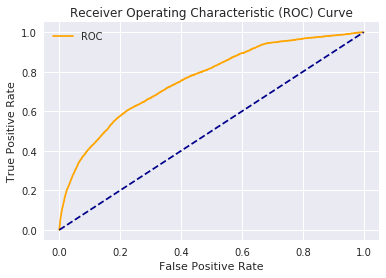

Accuracy:0.92
F1 score:0.04
Recall::0.02
Precision:0.56

 clasification report:
             precision    recall  f1-score   support

          0       0.92      1.00      0.96    114069
          1       0.56      0.02      0.04      9907

avg / total       0.89      0.92      0.89    123976


 confussion matrix:
[[113904    165]
 [  9694    213]]


In [48]:
#logistic model
clf_logic.fit(train_X, train_Y)
_predictions = clf_logic.predict(test_X)
_probas = clf_logic.predict_proba(test_X)
predictions = pd.Series(data=_predictions, index=test_X.index, name='predicted_value')

cols = [
        u'probability_of_value_%s' % label
        for (_, label) in sorted([(int(target_map[label]), label) for label in target_map])
    ]

probabilities = pd.DataFrame(data=_probas, index=test_X.index, columns=cols)

fn_metrics(test['__target__'], probabilities['probability_of_value_1'], predictions)

building tree 1 of 100


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.4s remaining:    0.0s


building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  2.3min finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    4.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


ROC value of :99.30


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    4.0s finished


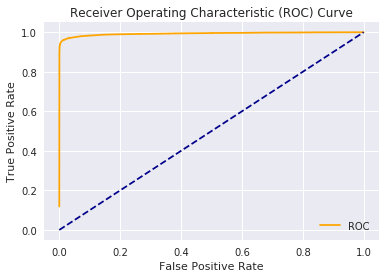

Accuracy:0.99
F1 score:0.95
Recall::0.92
Precision:0.99

 clasification report:
             precision    recall  f1-score   support

          0       0.99      1.00      1.00    114069
          1       0.99      0.92      0.95      9907

avg / total       0.99      0.99      0.99    123976


 confussion matrix:
[[113982     87]
 [   789   9118]]


In [49]:
#Random Forest
clf_rf.fit(train_X, train_Y)
_predictions = clf_rf.predict(test_X)
_probas = clf_rf.predict_proba(test_X)
predictions = pd.Series(data=_predictions, index=test_X.index, name='predicted_value')

cols = [
        u'probability_of_value_%s' % label
        for (_, label) in sorted([(int(target_map[label]), label) for label in target_map])
    ]

probabilities = pd.DataFrame(data=_probas, index=test_X.index, columns=cols)

fn_metrics(test['__target__'], probabilities['probability_of_value_1'], predictions)

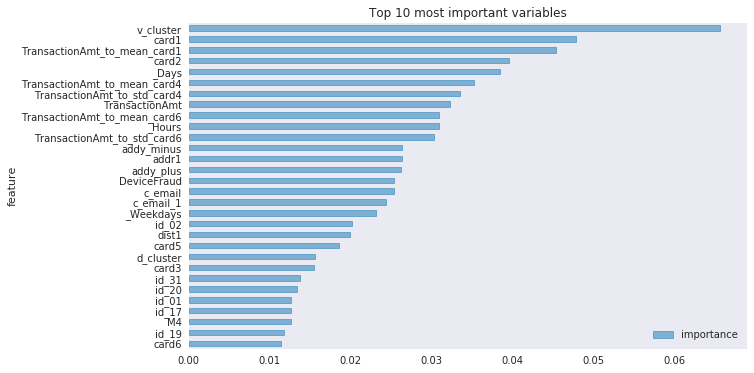

In [50]:
#IMportance of Feature for RF
clf = clf_rf
feature_importances_data = []
features = train_X.columns
for feature_name, feature_importance in zip(features, clf.feature_importances_):
    feature_importances_data.append({
        'feature': feature_name,
        'importance': feature_importance
    })

# Plot the results
pd.DataFrame(feature_importances_data)\
    .set_index('feature')\
    .sort_values(by='importance')[-30::]\
    .plot(title='Top 10 most important variables',
          kind='barh',
          figsize=(10, 6),
          color='#348ABD',
          alpha=0.6,
          lw='1',
          edgecolor='#348ABD',
          grid=False,)

ROC value of :83.97


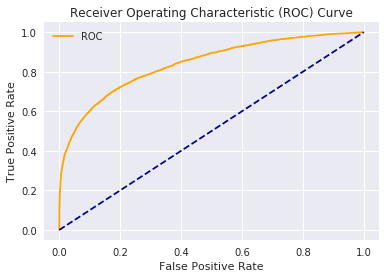

Accuracy:0.93
F1 score:0.36
Recall::0.22
Precision:0.86

 clasification report:
             precision    recall  f1-score   support

          0       0.94      1.00      0.97    114069
          1       0.86      0.22      0.36      9907

avg / total       0.93      0.93      0.92    123976


 confussion matrix:
[[113696    373]
 [  7686   2221]]


In [51]:
#Gradient Boosted Tree
clf_gbm.fit(train_X, train_Y)
_predictions = clf_gbm.predict(test_X)
_probas = clf_gbm.predict_proba(test_X)
predictions = pd.Series(data=_predictions, index=test_X.index, name='predicted_value')

cols = [
        u'probability_of_value_%s' % label
        for (_, label) in sorted([(int(target_map[label]), label) for label in target_map])
    ]

probabilities = pd.DataFrame(data=_probas, index=test_X.index, columns=cols)

fn_metrics(test['__target__'], probabilities['probability_of_value_1'], predictions)

/apps/hadoop/data01/dataiku/dataiku-dss-5.0.2/python.packages/xgboost/sklearn.py:200: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)
/apps/hadoop/data01/dataiku/dataiku-dss-5.0.2/python.packages/xgboost/sklearn.py:207: DeprecationWarning: The nthread parameter is deprecated as of version .6.Please use n_jobs instead.nthread is deprecated.
  'nthread is deprecated.', DeprecationWarning)


ROC value of :89.95


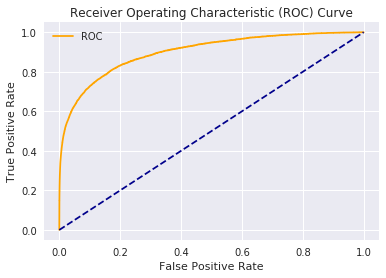

Accuracy:0.94
F1 score:0.51
Recall::0.36
Precision:0.87

 clasification report:
             precision    recall  f1-score   support

          0       0.95      1.00      0.97    114069
          1       0.87      0.36      0.51      9907

avg / total       0.94      0.94      0.93    123976


 confussion matrix:
[[113548    521]
 [  6324   3583]]


In [52]:
#XG Boost
clf_xgb.fit(train_X, train_Y)
_predictions = clf_xgb.predict(test_X)
_probas = clf_xgb.predict_proba(test_X)
predictions = pd.Series(data=_predictions, index=test_X.index, name='predicted_value')

cols = [
        u'probability_of_value_%s' % label
        for (_, label) in sorted([(int(target_map[label]), label) for label in target_map])
    ]

probabilities = pd.DataFrame(data=_probas, index=test_X.index, columns=cols)

fn_metrics(test['__target__'], probabilities['probability_of_value_1'], predictions)

ROC value of :68.72


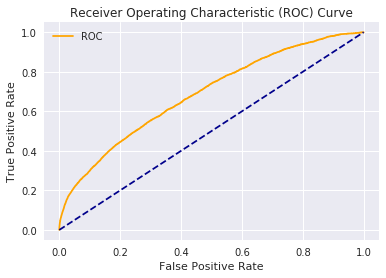

Accuracy:0.92
F1 score:0.03
Recall::0.01
Precision:0.77

 clasification report:
             precision    recall  f1-score   support

          0       0.92      1.00      0.96    114069
          1       0.77      0.01      0.03      9907

avg / total       0.91      0.92      0.88    123976


 confussion matrix:
[[114026     43]
 [  9763    144]]


In [53]:
#Neural Network
clf_nn.fit(train_X, train_Y)
_predictions = clf_nn.predict(test_X)
_probas = clf_nn.predict_proba(test_X)
predictions = pd.Series(data=_predictions, index=test_X.index, name='predicted_value')

cols = [
        u'probability_of_value_%s' % label
        for (_, label) in sorted([(int(target_map[label]), label) for label in target_map])
    ]

probabilities = pd.DataFrame(data=_probas, index=test_X.index, columns=cols)

fn_metrics(test['__target__'], probabilities['probability_of_value_1'], predictions)